In [1]:
import cobra
import matplotlib.pyplot as plt
import numpy as np
import csv
import pandas as pd
from pandas import DataFrame
import statistics
import plotly
import plotly.express as px
import plotly.graph_objs as go
import visualisation
import sklearn
from sklearn.cluster import KMeans
from sklearn import datasets
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
sns.set()
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from kneed import KneeLocator
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [14]:
data = pd.read_csv(r'/Users/katemeeson/Downloads/CCLE_expression_full_OC_only.csv')
N, D = data.shape
print('Samples: %s, Proteins: %s'%(N, D))
data = data.dropna(axis=1, how='any', thresh=None, subset=None, inplace=False)
data

Samples: 44, Proteins: 16384


,OC Broad IDs,TSPAN6 (ENSG00000000003),TNMD (ENSG00000000005),DPM1 (ENSG00000000419),SCYL3 (ENSG00000000457),C1orf112 (ENSG00000000460),FGR (ENSG00000000938),CFH (ENSG00000000971),FUCA2 (ENSG00000001036),GCLC (ENSG00000001084),...,TMEM216 (ENSG00000187049),RPS19BP1 (ENSG00000187051),TMPRSS11A (ENSG00000187054),TMEM262 (ENSG00000187066),C3orf70 (ENSG00000187068),TEAD1 (ENSG00000187079),OR2AK2 (ENSG00000187080),PLCD1 (ENSG00000187091),CCK (ENSG00000187094),ENTPD5 (ENSG00000187097)
0,ACH-000013,5.517591,0.056584,7.528884,1.910733,3.572890,0.028569,2.066950,5.419876,4.204767,...,4.393691,5.775841,0.000000,0.839960,0.028569,5.453847,0.000000,2.077243,0.250962,2.599318
1,ACH-000048,5.093391,0.028569,5.089159,2.392317,4.047015,0.000000,0.333424,2.611172,4.204767,...,1.599318,6.258142,0.000000,0.321928,0.238787,4.847496,0.000000,2.526069,0.042644,3.680324
2,ACH-000091,2.776104,0.070389,6.323010,1.989139,2.541019,0.201634,1.735522,5.317594,5.486071,...,3.693766,6.380591,0.000000,0.903038,0.028569,4.438958,0.000000,3.343408,0.000000,2.737687
3,ACH-000103,4.606442,0.000000,6.227857,2.495695,3.575312,0.097611,3.907852,4.234195,4.082362,...,3.360364,5.346957,0.097611,0.731183,0.084064,5.100557,0.097611,1.807355,0.389567,2.912650
4,ACH-000116,5.658783,0.000000,6.364222,2.310340,3.859970,0.028569,0.871844,6.480427,4.770829,...,4.617063,6.046142,0.000000,0.948601,0.214125,5.348374,0.000000,3.231125,0.333424,3.816600
5,ACH-000132,6.512069,0.000000,6.384050,2.636915,4.448240,0.014355,3.392317,5.358256,3.382667,...,4.507795,6.358256,0.028569,0.713696,0.084064,5.194954,0.000000,2.849999,1.416840,2.653060
6,ACH-000237,5.228819,0.000000,6.237449,1.691534,3.039138,0.584963,6.171527,7.395063,5.561021,...,3.780310,5.467279,0.014355,0.985500,0.000000,6.771225,0.000000,2.150560,0.000000,3.080658
7,ACH-000256,4.351911,0.000000,6.849374,1.992768,3.407353,0.137504,5.753551,4.802710,3.223423,...,3.028569,5.435962,0.014355,0.669027,0.028569,4.194560,0.084064,1.438293,1.014355,2.570463
8,ACH-000278,3.964399,0.042644,6.135248,1.867896,2.678072,0.000000,5.833902,4.969012,4.500165,...,4.214125,5.167920,0.028569,0.910733,0.014355,4.887525,0.000000,2.601697,2.695994,2.724650
9,ACH-000291,4.830864,0.000000,5.873075,1.918386,2.963474,0.056584,3.980025,6.966361,5.540709,...,4.334139,6.743757,0.014355,0.799087,0.000000,2.563158,0.000000,1.929791,0.000000,4.280214


In [15]:
cell_line_names = pd.read_csv(r'/Users/katemeeson/Downloads/CCLE_names.csv')
cell_line_names

,CCLE name
0,ONCO-DG-1
1,TOV-112D
2,OV56
3,Caov-4
4,OAW28
5,JHOS-2
6,JHOM-1
7,COV318
8,COV362
9,OV-90


In [16]:
data['OC Broad IDs'] = cell_line_names
data.to_csv('Tomics_cell_line_names.csv')
data = data.set_index('OC Broad IDs')
data

,TSPAN6 (ENSG00000000003),TNMD (ENSG00000000005),DPM1 (ENSG00000000419),SCYL3 (ENSG00000000457),C1orf112 (ENSG00000000460),FGR (ENSG00000000938),CFH (ENSG00000000971),FUCA2 (ENSG00000001036),GCLC (ENSG00000001084),NFYA (ENSG00000001167),...,TMEM216 (ENSG00000187049),RPS19BP1 (ENSG00000187051),TMPRSS11A (ENSG00000187054),TMEM262 (ENSG00000187066),C3orf70 (ENSG00000187068),TEAD1 (ENSG00000187079),OR2AK2 (ENSG00000187080),PLCD1 (ENSG00000187091),CCK (ENSG00000187094),ENTPD5 (ENSG00000187097)
OC Broad IDs,,,,,,,,,,,,,,,,,,,,,
ONCO-DG-1,5.517591,0.056584,7.528884,1.910733,3.572890,0.028569,2.066950,5.419876,4.204767,3.504620,...,4.393691,5.775841,0.000000,0.839960,0.028569,5.453847,0.000000,2.077243,0.250962,2.599318
TOV-112D,5.093391,0.028569,5.089159,2.392317,4.047015,0.000000,0.333424,2.611172,4.204767,5.125568,...,1.599318,6.258142,0.000000,0.321928,0.238787,4.847496,0.000000,2.526069,0.042644,3.680324
OV56,2.776104,0.070389,6.323010,1.989139,2.541019,0.201634,1.735522,5.317594,5.486071,3.949535,...,3.693766,6.380591,0.000000,0.903038,0.028569,4.438958,0.000000,3.343408,0.000000,2.737687
Caov-4,4.606442,0.000000,6.227857,2.495695,3.575312,0.097611,3.907852,4.234195,4.082362,3.712596,...,3.360364,5.346957,0.097611,0.731183,0.084064,5.100557,0.097611,1.807355,0.389567,2.912650
OAW28,5.658783,0.000000,6.364222,2.310340,3.859970,0.028569,0.871844,6.480427,4.770829,3.933573,...,4.617063,6.046142,0.000000,0.948601,0.214125,5.348374,0.000000,3.231125,0.333424,3.816600
JHOS-2,6.512069,0.000000,6.384050,2.636915,4.448240,0.014355,3.392317,5.358256,3.382667,3.941106,...,4.507795,6.358256,0.028569,0.713696,0.084064,5.194954,0.000000,2.849999,1.416840,2.653060
JHOM-1,5.228819,0.000000,6.237449,1.691534,3.039138,0.584963,6.171527,7.395063,5.561021,3.581351,...,3.780310,5.467279,0.014355,0.985500,0.000000,6.771225,0.000000,2.150560,0.000000,3.080658
COV318,4.351911,0.000000,6.849374,1.992768,3.407353,0.137504,5.753551,4.802710,3.223423,3.519793,...,3.028569,5.435962,0.014355,0.669027,0.028569,4.194560,0.084064,1.438293,1.014355,2.570463
COV362,3.964399,0.042644,6.135248,1.867896,2.678072,0.000000,5.833902,4.969012,4.500165,4.392317,...,4.214125,5.167920,0.028569,0.910733,0.014355,4.887525,0.000000,2.601697,2.695994,2.724650


# Tomics, n=44, gap statistic. 

In [8]:
def optimalK(data, nrefs=3, maxClusters=16):
    """
    Calculates KMeans optimal K using Gap Statistic 
    Params:
        data: ndarry of shape (n_samples, n_features)
        nrefs: number of sample reference datasets to create
        maxClusters: Maximum number of clusters to test for
    Returns: (gaps, optimalK)
    """
    gaps = np.zeros((len(range(1, maxClusters)),))
    resultsdf = pd.DataFrame({'clusterCount':[], 'gap':[]})
    for gap_index, k in enumerate(range(1, maxClusters)):
# Holder for reference dispersion results
        refDisps = np.zeros(nrefs)
# For n references, generate random sample and perform kmeans getting resulting dispersion of each loop
        for i in range(nrefs):
            
            # Create new random reference set
            randomReference = np.random.random_sample(size=data.shape)
            
            # Fit to it
            km = KMeans(k)
            km.fit(randomReference)
            
            refDisp = km.inertia_
            refDisps[i] = refDisp
# Fit cluster to original data and create dispersion
        km = KMeans(k)
        km.fit(data)
        
        origDisp = km.inertia_
# Calculate gap statistic
        gap = np.log(np.mean(refDisps)) - np.log(origDisp)
# Assign this loop's gap statistic to gaps
        gaps[gap_index] = gap
        
        resultsdf = resultsdf.append({'clusterCount':k, 'gap':gap}, ignore_index=True)
    return (gaps.argmax() + 1, resultsdf)
    score_g, df = optimalK(cluster_df, nrefs=5, maxClusters=30)
    plt.plot(df['clusterCount'], df['gap'], linestyle='--', marker='o', color='b');
    plt.xlabel('K');
    plt.ylabel('Gap Statistic');
    plt.title('Gap Statistic vs. K');

In [6]:
def gap_resids(number_of_iterations, max_clusters):
    column_names = ["cluster number"]
    df = pd.DataFrame(columns = column_names)
    df['cluster number'] = range(0,max_clusters)
    
    for n in number_of_iterations:
        run = optimalK(data, nrefs=5, maxClusters=max_clusters)
        run_df = run[1]

        clusterCount = []
        for count in run_df['clusterCount']:
            clusterCount.append(count)

        gap = []
        for g in run_df['gap']:
            gap.append(g)
            
        run_df_2 = run_df[3:16]
        clusterCount_2 = clusterCount[3:16]
        gap_2 = gap[3:16]
    
        gap_stat_model = ols('gap_2 ~ clusterCount_2', data=run_df_2).fit()
        resids = gap_stat_model.resid
        column_name = 'iteration_' + str(n)
        df[column_name] = resids
    return(df)

In [9]:
df = gap_resids(range(10),17)
df

,cluster number,iteration_0,iteration_1,iteration_2,iteration_3,iteration_4,iteration_5,iteration_6,iteration_7,iteration_8,iteration_9
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,-0.021468,-0.027227,-0.023714,-0.015940,-0.017245,-0.019205,-0.023816,-0.018262,-0.015341,-0.019647
4,4,-0.014518,-0.011605,0.001962,-0.002661,-0.005381,-0.003517,0.005343,-0.016057,-0.026029,-0.004586
5,5,0.028695,0.008750,0.005496,-0.004899,0.004212,-0.005641,0.000420,0.005815,-0.014364,0.000843
6,6,-0.017021,0.015082,-0.002112,0.010213,-0.003641,0.003912,0.001004,0.009459,0.023497,-0.003292
7,7,0.002251,0.015468,0.010736,0.012016,0.013200,0.006185,0.015549,0.005530,0.017159,0.012870
8,8,0.019819,0.018510,0.004693,0.000848,0.006360,0.017564,-0.006593,0.018244,0.017446,0.012409
9,9,0.021033,0.001421,0.008364,0.005139,-0.003196,0.004850,0.002016,0.012284,0.022712,0.022206


In [10]:
df_2 = df.iloc[3:16, :]
df_2

,cluster number,iteration_0,iteration_1,iteration_2,iteration_3,iteration_4,iteration_5,iteration_6,iteration_7,iteration_8,iteration_9
3,3,-0.021468,-0.027227,-0.023714,-0.015940,-0.017245,-0.019205,-0.023816,-0.018262,-0.015341,-0.019647
4,4,-0.014518,-0.011605,0.001962,-0.002661,-0.005381,-0.003517,0.005343,-0.016057,-0.026029,-0.004586
5,5,0.028695,0.008750,0.005496,-0.004899,0.004212,-0.005641,0.000420,0.005815,-0.014364,0.000843
6,6,-0.017021,0.015082,-0.002112,0.010213,-0.003641,0.003912,0.001004,0.009459,0.023497,-0.003292
7,7,0.002251,0.015468,0.010736,0.012016,0.013200,0.006185,0.015549,0.005530,0.017159,0.012870
8,8,0.019819,0.018510,0.004693,0.000848,0.006360,0.017564,-0.006593,0.018244,0.017446,0.012409
9,9,0.021033,0.001421,0.008364,0.005139,-0.003196,0.004850,0.002016,0.012284,0.022712,0.022206
10,10,0.003656,-0.000538,0.000838,0.008336,0.017364,0.018755,0.014766,-0.001998,0.003697,0.006272
11,11,-0.001467,-0.004847,0.011969,0.009149,0.006790,-0.000024,0.010396,0.010172,0.010788,-0.008054
12,12,0.006392,-0.006616,0.000464,-0.002984,0.010650,0.001084,0.012914,-0.002989,-0.014038,0.007734


In [11]:
sums = []
for n in range(13):
    sum_of_iteration = sum(df_2.iloc[n,1:13])
    sums.append(sum_of_iteration)
    
sums

[-0.20186439877762163,
 -0.07704833914062537,
 0.029326877862537515,
 0.03710031491758148,
 0.11096402841707942,
 0.10929902439354944,
 0.0968284109881834,
 0.07114774488916153,
 0.04487348071638575,
 0.012610941098311956,
 -0.034060913189323916,
 -0.09598660525228242,
 -0.1031905669227633]

In [12]:
df_2['sums'] = sums
df_2

<ipython-input-12-455ec691647b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['sums'] = sums


,cluster number,iteration_0,iteration_1,iteration_2,iteration_3,iteration_4,iteration_5,iteration_6,iteration_7,iteration_8,iteration_9,sums
3,3,-0.021468,-0.027227,-0.023714,-0.015940,-0.017245,-0.019205,-0.023816,-0.018262,-0.015341,-0.019647,-0.201864
4,4,-0.014518,-0.011605,0.001962,-0.002661,-0.005381,-0.003517,0.005343,-0.016057,-0.026029,-0.004586,-0.077048
5,5,0.028695,0.008750,0.005496,-0.004899,0.004212,-0.005641,0.000420,0.005815,-0.014364,0.000843,0.029327
6,6,-0.017021,0.015082,-0.002112,0.010213,-0.003641,0.003912,0.001004,0.009459,0.023497,-0.003292,0.037100
7,7,0.002251,0.015468,0.010736,0.012016,0.013200,0.006185,0.015549,0.005530,0.017159,0.012870,0.110964
8,8,0.019819,0.018510,0.004693,0.000848,0.006360,0.017564,-0.006593,0.018244,0.017446,0.012409,0.109299
9,9,0.021033,0.001421,0.008364,0.005139,-0.003196,0.004850,0.002016,0.012284,0.022712,0.022206,0.096828
10,10,0.003656,-0.000538,0.000838,0.008336,0.017364,0.018755,0.014766,-0.001998,0.003697,0.006272,0.071148
11,11,-0.001467,-0.004847,0.011969,0.009149,0.006790,-0.000024,0.010396,0.010172,0.010788,-0.008054,0.044873
12,12,0.006392,-0.006616,0.000464,-0.002984,0.010650,0.001084,0.012914,-0.002989,-0.014038,0.007734,0.012611


Text(0, 0.5, 'Residual for Gap statistic across iterations')

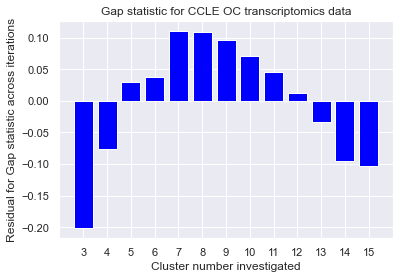

In [13]:
sum_of_gap_resids = df_2['sums']
clusters_investigated = []
for n in range(3,16):
    clusters_investigated.append(n)
clusters_investigated = tuple(clusters_investigated)
x_pos = np.arange(len(clusters_investigated))
gap_plot = plt.bar(x_pos, sum_of_gap_resids, color = 'blue')
plt.xticks(x_pos, clusters_investigated)
plt.title('Gap statistic for CCLE OC transcriptomics data')
plt.xlabel('Cluster number investigated')
plt.ylabel('Residual for Gap statistic across iterations')

# Tomics, n=44, DB score. 

In [17]:
data

,TSPAN6 (ENSG00000000003),TNMD (ENSG00000000005),DPM1 (ENSG00000000419),SCYL3 (ENSG00000000457),C1orf112 (ENSG00000000460),FGR (ENSG00000000938),CFH (ENSG00000000971),FUCA2 (ENSG00000001036),GCLC (ENSG00000001084),NFYA (ENSG00000001167),...,TMEM216 (ENSG00000187049),RPS19BP1 (ENSG00000187051),TMPRSS11A (ENSG00000187054),TMEM262 (ENSG00000187066),C3orf70 (ENSG00000187068),TEAD1 (ENSG00000187079),OR2AK2 (ENSG00000187080),PLCD1 (ENSG00000187091),CCK (ENSG00000187094),ENTPD5 (ENSG00000187097)
OC Broad IDs,,,,,,,,,,,,,,,,,,,,,
ONCO-DG-1,5.517591,0.056584,7.528884,1.910733,3.572890,0.028569,2.066950,5.419876,4.204767,3.504620,...,4.393691,5.775841,0.000000,0.839960,0.028569,5.453847,0.000000,2.077243,0.250962,2.599318
TOV-112D,5.093391,0.028569,5.089159,2.392317,4.047015,0.000000,0.333424,2.611172,4.204767,5.125568,...,1.599318,6.258142,0.000000,0.321928,0.238787,4.847496,0.000000,2.526069,0.042644,3.680324
OV56,2.776104,0.070389,6.323010,1.989139,2.541019,0.201634,1.735522,5.317594,5.486071,3.949535,...,3.693766,6.380591,0.000000,0.903038,0.028569,4.438958,0.000000,3.343408,0.000000,2.737687
Caov-4,4.606442,0.000000,6.227857,2.495695,3.575312,0.097611,3.907852,4.234195,4.082362,3.712596,...,3.360364,5.346957,0.097611,0.731183,0.084064,5.100557,0.097611,1.807355,0.389567,2.912650
OAW28,5.658783,0.000000,6.364222,2.310340,3.859970,0.028569,0.871844,6.480427,4.770829,3.933573,...,4.617063,6.046142,0.000000,0.948601,0.214125,5.348374,0.000000,3.231125,0.333424,3.816600
JHOS-2,6.512069,0.000000,6.384050,2.636915,4.448240,0.014355,3.392317,5.358256,3.382667,3.941106,...,4.507795,6.358256,0.028569,0.713696,0.084064,5.194954,0.000000,2.849999,1.416840,2.653060
JHOM-1,5.228819,0.000000,6.237449,1.691534,3.039138,0.584963,6.171527,7.395063,5.561021,3.581351,...,3.780310,5.467279,0.014355,0.985500,0.000000,6.771225,0.000000,2.150560,0.000000,3.080658
COV318,4.351911,0.000000,6.849374,1.992768,3.407353,0.137504,5.753551,4.802710,3.223423,3.519793,...,3.028569,5.435962,0.014355,0.669027,0.028569,4.194560,0.084064,1.438293,1.014355,2.570463
COV362,3.964399,0.042644,6.135248,1.867896,2.678072,0.000000,5.833902,4.969012,4.500165,4.392317,...,4.214125,5.167920,0.028569,0.910733,0.014355,4.887525,0.000000,2.601697,2.695994,2.724650


In [19]:
column_names = ["cluster number"]

df_db_it = pd.DataFrame(columns = column_names)
df_db_it['cluster number'] = range(2,16)
df_db_it

,cluster number
0,2
1,3
2,4
3,5
4,6
5,7
6,8
7,9
8,10
9,11


In [20]:
from sklearn.metrics import davies_bouldin_score

def get_kmeans_score(data, center):
    kmeans = KMeans(n_clusters=center)
    model = kmeans.fit_predict(data)
    score = davies_bouldin_score(data, model)
    return(score)

In [23]:
def resid_regression_db_score(number_of_iterations):
    for n in number_of_iterations:
        scores = []
        centers = []
        for num in range(2,16):
            centers.append(num)
        for center in centers:
            scores.append(get_kmeans_score(data, center))
        
        df_db['cluster number'] = centers
        df_db['DB score'] = scores
        
        model = ols('scores ~ centers', data=df_db).fit()
        
        gap_stat_model = ols('scores ~ centers', data=df_db).fit()
        resids = gap_stat_model.resid
        column_name = 'iteration_' + str(n)
        df_db_it[column_name] = resids
        
    return(df_db_it)

In [24]:
resid_regression_db_score(range(50))

,cluster number,iteration_0,iteration_1,iteration_2,iteration_3,iteration_4,iteration_5,iteration_6,iteration_7,iteration_8,...,iteration_40,iteration_41,iteration_42,iteration_43,iteration_44,iteration_45,iteration_46,iteration_47,iteration_48,iteration_49
0,2,0.304783,0.156324,0.259438,0.160908,0.170783,0.163989,0.197930,0.244037,0.240728,...,0.259605,0.232423,0.169696,0.336787,0.218016,0.315472,0.369928,0.277263,0.320941,0.212748
1,3,-0.069419,0.333145,0.106080,0.155799,-0.127340,-0.220566,0.217890,-0.099449,0.078718,...,0.015228,0.327262,0.169871,-0.132221,0.011095,0.028313,-0.051650,0.031211,0.070218,0.033293
2,4,0.012814,-0.125506,-0.237606,-0.177490,-0.239809,0.261151,-0.248466,-0.130587,-0.237851,...,0.054063,-0.348167,-0.005625,0.021335,-0.254019,0.019932,-0.141863,0.221836,-0.206428,0.117206
3,5,-0.148889,-0.094301,-0.084100,0.061141,0.108634,-0.039630,0.061324,0.058486,-0.159309,...,-0.020644,-0.143728,-0.107814,-0.159756,0.077299,-0.179554,0.003359,-0.165161,0.089379,-0.100640
4,6,-0.042878,0.027161,0.075993,0.088582,0.100485,0.025470,-0.216364,0.133818,0.126141,...,-0.153925,0.050197,-0.082636,-0.209983,0.053985,-0.127500,0.016491,-0.181920,-0.291194,-0.025984
5,7,0.069727,-0.470515,0.129821,-0.090684,-0.011555,-0.202494,-0.015363,0.069225,-0.028616,...,-0.039531,-0.053796,-0.067270,0.068666,-0.019464,-0.134634,-0.122981,-0.018632,-0.015217,-0.199617
6,8,-0.117737,-0.024747,-0.211458,-0.163806,0.080331,-0.074383,-0.131848,-0.043672,-0.065457,...,-0.292527,-0.156014,-0.125378,0.120571,-0.248252,0.127361,-0.188197,-0.363851,0.077723,-0.092837
7,9,-0.203926,-0.122867,-0.217285,-0.293019,0.111865,0.176152,-0.016018,-0.358939,-0.139359,...,-0.244263,0.033613,-0.105316,-0.111612,0.071961,-0.210285,-0.003731,-0.040558,-0.253390,-0.078881
8,10,0.025323,0.093708,0.006136,-0.019981,-0.057601,-0.229297,-0.017178,0.008239,0.053070,...,0.094951,-0.191284,-0.147479,-0.010070,0.045036,-0.018291,-0.147847,-0.057693,-0.102007,-0.175464
9,11,-0.057794,0.049570,-0.017006,0.084869,-0.084616,0.043829,0.003164,-0.125843,0.128784,...,0.042463,0.006900,0.014910,-0.061157,-0.033010,-0.106933,0.063832,-0.099316,0.044937,0.062634


In [26]:
df_db_it.iloc[0,1:51]

iteration_0     0.304783
iteration_1     0.156324
iteration_2     0.259438
iteration_3     0.160908
iteration_4     0.170783
iteration_5     0.163989
iteration_6     0.197930
iteration_7     0.244037
iteration_8     0.240728
iteration_9     0.169643
iteration_10    0.305627
iteration_11    0.285782
iteration_12    0.250762
iteration_13    0.281469
iteration_14    0.403749
iteration_15    0.212356
iteration_16    0.302545
iteration_17    0.342302
iteration_18    0.302115
iteration_19    0.301391
iteration_20    0.296275
iteration_21    0.229344
iteration_22    0.367980
iteration_23    0.228004
iteration_24    0.153291
iteration_25    0.235967
iteration_26    0.264605
iteration_27    0.216788
iteration_28    0.305247
iteration_29    0.181073
iteration_30    0.340216
iteration_31    0.333551
iteration_32    0.286428
iteration_33    0.168608
iteration_34    0.228243
iteration_35    0.405152
iteration_36    0.203161
iteration_37    0.144579
iteration_38    0.372587
iteration_39    0.227467


In [25]:
sums_db = []
for n in range(0,14):
    sum_of_iteration_db = sum(df_db_it.iloc[n,1:51])
    sums_db.append(sum_of_iteration_db)
    
sums_db

[12.958105859373127,
 -0.3298893896031596,
 -4.539108383609952,
 -0.8741389744834085,
 -1.011288882527873,
 -4.1991128394163315,
 -4.012527012089462,
 -4.250994707125707,
 -1.4722537703398397,
 -1.1919848505599586,
 -0.8502177824249826,
 1.0050270233645726,
 3.1328460078780935,
 5.635537701565079]

In [27]:
df_db_it['sums'] = sums_db
df_db_it

,cluster number,iteration_0,iteration_1,iteration_2,iteration_3,iteration_4,iteration_5,iteration_6,iteration_7,iteration_8,...,iteration_41,iteration_42,iteration_43,iteration_44,iteration_45,iteration_46,iteration_47,iteration_48,iteration_49,sums
0,2,0.304783,0.156324,0.259438,0.160908,0.170783,0.163989,0.197930,0.244037,0.240728,...,0.232423,0.169696,0.336787,0.218016,0.315472,0.369928,0.277263,0.320941,0.212748,12.958106
1,3,-0.069419,0.333145,0.106080,0.155799,-0.127340,-0.220566,0.217890,-0.099449,0.078718,...,0.327262,0.169871,-0.132221,0.011095,0.028313,-0.051650,0.031211,0.070218,0.033293,-0.329889
2,4,0.012814,-0.125506,-0.237606,-0.177490,-0.239809,0.261151,-0.248466,-0.130587,-0.237851,...,-0.348167,-0.005625,0.021335,-0.254019,0.019932,-0.141863,0.221836,-0.206428,0.117206,-4.539108
3,5,-0.148889,-0.094301,-0.084100,0.061141,0.108634,-0.039630,0.061324,0.058486,-0.159309,...,-0.143728,-0.107814,-0.159756,0.077299,-0.179554,0.003359,-0.165161,0.089379,-0.100640,-0.874139
4,6,-0.042878,0.027161,0.075993,0.088582,0.100485,0.025470,-0.216364,0.133818,0.126141,...,0.050197,-0.082636,-0.209983,0.053985,-0.127500,0.016491,-0.181920,-0.291194,-0.025984,-1.011289
5,7,0.069727,-0.470515,0.129821,-0.090684,-0.011555,-0.202494,-0.015363,0.069225,-0.028616,...,-0.053796,-0.067270,0.068666,-0.019464,-0.134634,-0.122981,-0.018632,-0.015217,-0.199617,-4.199113
6,8,-0.117737,-0.024747,-0.211458,-0.163806,0.080331,-0.074383,-0.131848,-0.043672,-0.065457,...,-0.156014,-0.125378,0.120571,-0.248252,0.127361,-0.188197,-0.363851,0.077723,-0.092837,-4.012527
7,9,-0.203926,-0.122867,-0.217285,-0.293019,0.111865,0.176152,-0.016018,-0.358939,-0.139359,...,0.033613,-0.105316,-0.111612,0.071961,-0.210285,-0.003731,-0.040558,-0.253390,-0.078881,-4.250995
8,10,0.025323,0.093708,0.006136,-0.019981,-0.057601,-0.229297,-0.017178,0.008239,0.053070,...,-0.191284,-0.147479,-0.010070,0.045036,-0.018291,-0.147847,-0.057693,-0.102007,-0.175464,-1.472254
9,11,-0.057794,0.049570,-0.017006,0.084869,-0.084616,0.043829,0.003164,-0.125843,0.128784,...,0.006900,0.014910,-0.061157,-0.033010,-0.106933,0.063832,-0.099316,0.044937,0.062634,-1.191985


In [38]:
sum_of_db_resids = df_db_it['sums'][1:14]
sum_of_db_resids

1    -0.329889
2    -4.539108
3    -0.874139
4    -1.011289
5    -4.199113
6    -4.012527
7    -4.250995
8    -1.472254
9    -1.191985
10   -0.850218
11    1.005027
12    3.132846
13    5.635538
Name: sums, dtype: float64

<BarContainer object of 13 artists>

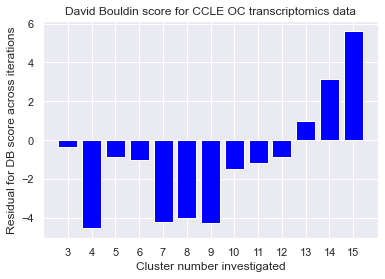

In [39]:
sum_of_db_resids = df_db_it['sums'][1:14]
clusters_investigated_db = []
for n in range(3,16):
    clusters_investigated_db.append(n)
clusters_investigated_db = tuple(clusters_investigated_db)
x_pos_db = np.arange(len(clusters_investigated_db))
db_plot = plt.bar(x_pos_db, sum_of_db_resids, color = 'blue')
plt.xticks(x_pos_db, clusters_investigated_db)
plt.title('David Bouldin score for CCLE OC transcriptomics data')
plt.xlabel('Cluster number investigated')
plt.ylabel('Residual for DB score across iterations')
db_plot

Text(0.5, 1.0, 'Davies Bouldin score vs. cluster number')

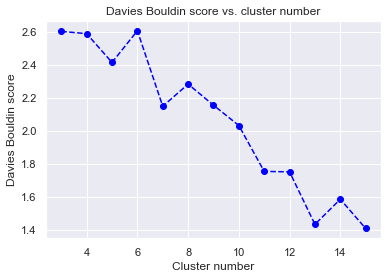

In [40]:
column_names = ["cluster number", "DB score"]

df1 = pd.DataFrame(columns = column_names)

scores = []
centers = []
for n in range(3,16):
    centers.append(n)
for center in centers:
    scores.append(get_kmeans_score(data, center))
df1['cluster number'] = centers
df1['DB score'] = scores
plt.plot(centers, scores, linestyle='--', marker='o', color='blue')
plt.xlabel('Cluster number')
plt.ylabel('Davies Bouldin score')
plt.title('Davies Bouldin score vs. cluster number')

# Tomics, n=44, K-means clustering with optimal k=9

In [41]:
data

,TSPAN6 (ENSG00000000003),TNMD (ENSG00000000005),DPM1 (ENSG00000000419),SCYL3 (ENSG00000000457),C1orf112 (ENSG00000000460),FGR (ENSG00000000938),CFH (ENSG00000000971),FUCA2 (ENSG00000001036),GCLC (ENSG00000001084),NFYA (ENSG00000001167),...,TMEM216 (ENSG00000187049),RPS19BP1 (ENSG00000187051),TMPRSS11A (ENSG00000187054),TMEM262 (ENSG00000187066),C3orf70 (ENSG00000187068),TEAD1 (ENSG00000187079),OR2AK2 (ENSG00000187080),PLCD1 (ENSG00000187091),CCK (ENSG00000187094),ENTPD5 (ENSG00000187097)
OC Broad IDs,,,,,,,,,,,,,,,,,,,,,
ONCO-DG-1,5.517591,0.056584,7.528884,1.910733,3.572890,0.028569,2.066950,5.419876,4.204767,3.504620,...,4.393691,5.775841,0.000000,0.839960,0.028569,5.453847,0.000000,2.077243,0.250962,2.599318
TOV-112D,5.093391,0.028569,5.089159,2.392317,4.047015,0.000000,0.333424,2.611172,4.204767,5.125568,...,1.599318,6.258142,0.000000,0.321928,0.238787,4.847496,0.000000,2.526069,0.042644,3.680324
OV56,2.776104,0.070389,6.323010,1.989139,2.541019,0.201634,1.735522,5.317594,5.486071,3.949535,...,3.693766,6.380591,0.000000,0.903038,0.028569,4.438958,0.000000,3.343408,0.000000,2.737687
Caov-4,4.606442,0.000000,6.227857,2.495695,3.575312,0.097611,3.907852,4.234195,4.082362,3.712596,...,3.360364,5.346957,0.097611,0.731183,0.084064,5.100557,0.097611,1.807355,0.389567,2.912650
OAW28,5.658783,0.000000,6.364222,2.310340,3.859970,0.028569,0.871844,6.480427,4.770829,3.933573,...,4.617063,6.046142,0.000000,0.948601,0.214125,5.348374,0.000000,3.231125,0.333424,3.816600
JHOS-2,6.512069,0.000000,6.384050,2.636915,4.448240,0.014355,3.392317,5.358256,3.382667,3.941106,...,4.507795,6.358256,0.028569,0.713696,0.084064,5.194954,0.000000,2.849999,1.416840,2.653060
JHOM-1,5.228819,0.000000,6.237449,1.691534,3.039138,0.584963,6.171527,7.395063,5.561021,3.581351,...,3.780310,5.467279,0.014355,0.985500,0.000000,6.771225,0.000000,2.150560,0.000000,3.080658
COV318,4.351911,0.000000,6.849374,1.992768,3.407353,0.137504,5.753551,4.802710,3.223423,3.519793,...,3.028569,5.435962,0.014355,0.669027,0.028569,4.194560,0.084064,1.438293,1.014355,2.570463
COV362,3.964399,0.042644,6.135248,1.867896,2.678072,0.000000,5.833902,4.969012,4.500165,4.392317,...,4.214125,5.167920,0.028569,0.910733,0.014355,4.887525,0.000000,2.601697,2.695994,2.724650


In [42]:
scaler = StandardScaler()
segmentation_std = scaler.fit_transform(data)
pca = PCA(n_components = 3)
pca.fit(segmentation_std)
scores_pca = pca.transform(segmentation_std)
pca.transform(segmentation_std)

array([[-17.07683471,  30.02801038,  21.4393791 ],
       [-45.36735306, -44.19099252,  59.89907262],
       [  6.42811254,  -7.47935637, -36.21499577],
       [-13.4251392 ,  69.03623805,  34.85641427],
       [-61.61447695,  30.62086025,  17.70233708],
       [  5.67489424,  22.94657095, -43.2065193 ],
       [-22.25933348,  -8.12363664, -35.04039461],
       [ 51.85269102,  27.87940518,  27.40875081],
       [ 10.82956381,  -5.65174011, -11.42816866],
       [ 25.40270308,  13.76628769,  24.20855272],
       [-58.91975562,  12.39774254, -47.27456898],
       [ -9.45867673, -35.95843081, -25.3914516 ],
       [-56.01229201,  53.69411376, -35.58766689],
       [ 18.05055524,  18.15095224,  29.27855502],
       [ -5.41509065, -60.92132123,  -3.16596866],
       [-45.40541186,  86.94604743,  -8.28048794],
       [ 33.92965845,   5.33652546, -14.84163525],
       [ 25.57528377, -35.10423573, -22.09002421],
       [ -3.08513243,  40.57331758,  13.23958252],
       [ 31.95121695,  40.88447

In [43]:
PCA_EV = pca.explained_variance_ratio_
print('Explained variance: ', PCA_EV)
print('Principal component 1: ', PCA_EV[0]*100)
print('Principal component 2: ', PCA_EV[1]*100)
print('Principal component 3: ', PCA_EV[2]*100)

Explained variance:  [0.1200815  0.08117891 0.05334689]
Principal component 1:  12.008150361974437
Principal component 2:  8.117890545093799
Principal component 3:  5.334688814104855


In [44]:
wcss = []
max_clusters = 20
for i in range(1, max_clusters):
    kmeans_pca = KMeans(i, init='k-means++', random_state=42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)
    
optimal_cluster_number = 9
kmeans_pca = KMeans(n_clusters = optimal_cluster_number, init = 'k-means++', random_state = 42)
kmeans_pca.fit(scores_pca)
labels = kmeans_pca.predict(scores_pca)

In [47]:
kmeans_pca = KMeans(n_clusters=9, init='k-means++', random_state=42)
kmeans_pca.fit(scores_pca)
data['Cluster'] = kmeans_pca.labels_
data['Cluster']

OC Broad IDs
ONCO-DG-1    8
TOV-112D     5
OV56         0
Caov-4       8
OAW28        8
JHOS-2       0
JHOM-1       1
COV318       4
COV362       0
OV-90        4
EFO-21       3
JHOC-5       6
JHOM-2B      3
OVSAHO       4
TYK-nu       6
OVKATE       3
SNU-8        0
59M          6
KURAMOCHI    8
OVISE        4
HEY A8       6
FU-OV-1      1
JHOS-4       8
COV644       0
OVCAR-4      4
SNU-119      8
OVMANA       7
A2780        5
OVTOKO       2
OV7          6
OVCAR-8      6
RMUG-S       0
OAW42        4
Caov-3       1
RMG-I        2
MCAS         0
SK-OV-3      1
TOV-21G      1
ES-2         6
EFO-27       1
OVK18        5
OC 314       1
IGROV-1      1
NIHOVCAR3    8
Name: Cluster, dtype: int32

In [48]:
data_sorted = data.sort_values(by=['Cluster'])
data_sorted

,TSPAN6 (ENSG00000000003),TNMD (ENSG00000000005),DPM1 (ENSG00000000419),SCYL3 (ENSG00000000457),C1orf112 (ENSG00000000460),FGR (ENSG00000000938),CFH (ENSG00000000971),FUCA2 (ENSG00000001036),GCLC (ENSG00000001084),NFYA (ENSG00000001167),...,RPS19BP1 (ENSG00000187051),TMPRSS11A (ENSG00000187054),TMEM262 (ENSG00000187066),C3orf70 (ENSG00000187068),TEAD1 (ENSG00000187079),OR2AK2 (ENSG00000187080),PLCD1 (ENSG00000187091),CCK (ENSG00000187094),ENTPD5 (ENSG00000187097),Cluster
OC Broad IDs,,,,,,,,,,,,,,,,,,,,,
OV56,2.776104,0.070389,6.323010,1.989139,2.541019,0.201634,1.735522,5.317594,5.486071,3.949535,...,6.380591,0.000000,0.903038,0.028569,4.438958,0.000000,3.343408,0.000000,2.737687,0
RMUG-S,5.150560,0.000000,5.842727,2.134221,4.031219,0.000000,1.608809,5.481880,6.417853,3.137504,...,6.828835,0.000000,0.704872,0.014355,6.027464,0.000000,1.220330,0.000000,2.204767,0
JHOS-2,6.512069,0.000000,6.384050,2.636915,4.448240,0.014355,3.392317,5.358256,3.382667,3.941106,...,6.358256,0.028569,0.713696,0.084064,5.194954,0.000000,2.849999,1.416840,2.653060,0
COV644,4.778209,0.000000,5.956986,2.046142,3.880686,0.201634,0.790772,6.660495,4.002703,4.233428,...,5.803227,0.000000,0.475085,0.189034,6.048105,0.000000,3.037382,0.000000,2.456806,0
COV362,3.964399,0.042644,6.135248,1.867896,2.678072,0.000000,5.833902,4.969012,4.500165,4.392317,...,5.167920,0.028569,0.910733,0.014355,4.887525,0.000000,2.601697,2.695994,2.724650,0
MCAS,3.427606,0.000000,6.881909,1.952334,3.640390,0.014355,0.226509,5.551208,5.157044,4.472488,...,6.519322,0.000000,0.475085,0.000000,4.932628,0.000000,1.327687,0.124328,2.324811,0
SNU-8,5.373300,0.000000,6.598425,1.996389,4.123501,0.014355,5.377471,5.997518,4.111031,4.165108,...,5.978653,0.000000,0.389567,0.000000,5.177121,0.028569,1.063503,0.111031,2.944858,0
FU-OV-1,5.932864,0.604071,6.687341,1.959770,3.896272,0.028569,0.163499,5.047015,4.301588,4.521051,...,5.919340,0.000000,0.773996,0.042644,5.700162,0.000000,1.014355,0.150560,2.889474,1
Caov-3,5.702103,0.000000,7.109778,1.773996,3.505891,0.084064,2.885574,6.671576,6.387673,5.299391,...,6.788816,0.042644,0.807355,0.485427,5.454834,0.042644,1.875780,0.594549,2.189034,1


In [70]:
data_sorted[37:44]

,TSPAN6 (ENSG00000000003),TNMD (ENSG00000000005),DPM1 (ENSG00000000419),SCYL3 (ENSG00000000457),C1orf112 (ENSG00000000460),FGR (ENSG00000000938),CFH (ENSG00000000971),FUCA2 (ENSG00000001036),GCLC (ENSG00000001084),NFYA (ENSG00000001167),...,RPS19BP1 (ENSG00000187051),TMPRSS11A (ENSG00000187054),TMEM262 (ENSG00000187066),C3orf70 (ENSG00000187068),TEAD1 (ENSG00000187079),OR2AK2 (ENSG00000187080),PLCD1 (ENSG00000187091),CCK (ENSG00000187094),ENTPD5 (ENSG00000187097),Cluster
OC Broad IDs,,,,,,,,,,,,,,,,,,,,,
ONCO-DG-1,5.517591,0.056584,7.528884,1.910733,3.572890,0.028569,2.066950,5.419876,4.204767,3.504620,...,5.775841,0.000000,0.839960,0.028569,5.453847,0.000000,2.077243,0.250962,2.599318,8
JHOS-4,4.898208,0.000000,6.849499,2.521051,3.941106,0.070389,1.622930,4.826803,4.386811,3.676944,...,6.255501,0.014355,0.831877,0.000000,4.175525,0.000000,2.356144,0.367371,2.389567,8
KURAMOCHI,4.693208,0.189034,6.848623,2.641546,3.557042,0.111031,2.446256,5.174726,3.289834,4.553361,...,5.647890,0.014355,0.992768,0.014355,5.165510,0.000000,2.531069,0.000000,2.599318,8
OAW28,5.658783,0.000000,6.364222,2.310340,3.859970,0.028569,0.871844,6.480427,4.770829,3.933573,...,6.046142,0.000000,0.948601,0.214125,5.348374,0.000000,3.231125,0.333424,3.816600,8
Caov-4,4.606442,0.000000,6.227857,2.495695,3.575312,0.097611,3.907852,4.234195,4.082362,3.712596,...,5.346957,0.097611,0.731183,0.084064,5.100557,0.097611,1.807355,0.389567,2.912650,8
SNU-119,4.893848,0.000000,6.059399,2.223423,3.420887,0.042644,2.813525,7.176223,4.002703,5.774524,...,5.860218,0.000000,1.035624,0.298658,5.639232,0.000000,2.925999,0.286881,3.343408,8
NIHOVCAR3,5.823495,0.000000,7.369292,2.100978,4.221877,0.042644,0.910733,5.672991,4.676380,4.013462,...,6.117695,0.056584,1.035624,0.070389,5.652773,0.000000,2.286881,2.150560,2.737687,8


In [71]:
data['Cluster'] = data['Cluster'].map({0:'OV56, RMUG-S, JHOS-2, COV644, COV362, MCAS, SNU-8', 1:'FU-OV-1, Caov-3, TOV-21G, IGROV-1, EFO-27, SK-OV-3, OC 314, JHOM-1', 2:'RMG-I, OVTOKO', 3:'JHOM-2B, OVKATE, EFO-21', 4:'OV-90, OVSAHO, OAW42, OVCAR-4, COV318, OVISE', 5:'OVK18, TOV-112D, A2780', 6:'JHOC-5, 59M, OV7, OVCAR-8, TYK-nu, HEY A8, ES-2', 7:'OVMANA', 8:'ONCO-DG-1, JHOS-4, KURAMOCHI, OAW28, Caov-4, SNU-119, NIHOVCAR3'})

In [72]:
df_segm_pca_kmeans = pd.concat([data.reset_index(drop = True), pd.DataFrame(scores_pca)], axis = 1)
df_segm_pca_kmeans.columns.values[-3:]=['Component 1', 'Component 2', 'Component 3']
df_segm_pca_kmeans['Segment K-means PCA'] = kmeans_pca.labels_
df_segm_pca_kmeans.head()

,TSPAN6 (ENSG00000000003),TNMD (ENSG00000000005),DPM1 (ENSG00000000419),SCYL3 (ENSG00000000457),C1orf112 (ENSG00000000460),FGR (ENSG00000000938),CFH (ENSG00000000971),FUCA2 (ENSG00000001036),GCLC (ENSG00000001084),NFYA (ENSG00000001167),...,TEAD1 (ENSG00000187079),OR2AK2 (ENSG00000187080),PLCD1 (ENSG00000187091),CCK (ENSG00000187094),ENTPD5 (ENSG00000187097),Cluster,Component 1,Component 2,Component 3,Segment K-means PCA
0,5.517591,0.056584,7.528884,1.910733,3.572890,0.028569,2.066950,5.419876,4.204767,3.504620,...,5.453847,0.000000,2.077243,0.250962,2.599318,"ONCO-DG-1, JHOS-4, KURAMOCHI, OAW28, Caov-4, S...",-17.076835,30.028010,21.439379,8
1,5.093391,0.028569,5.089159,2.392317,4.047015,0.000000,0.333424,2.611172,4.204767,5.125568,...,4.847496,0.000000,2.526069,0.042644,3.680324,"OVK18, TOV-112D, A2780",-45.367353,-44.190993,59.899073,5
2,2.776104,0.070389,6.323010,1.989139,2.541019,0.201634,1.735522,5.317594,5.486071,3.949535,...,4.438958,0.000000,3.343408,0.000000,2.737687,"OV56, RMUG-S, JHOS-2, COV644, COV362, MCAS, SNU-8",6.428113,-7.479356,-36.214996,0
3,4.606442,0.000000,6.227857,2.495695,3.575312,0.097611,3.907852,4.234195,4.082362,3.712596,...,5.100557,0.097611,1.807355,0.389567,2.912650,"ONCO-DG-1, JHOS-4, KURAMOCHI, OAW28, Caov-4, S...",-13.425139,69.036238,34.856414,8
4,5.658783,0.000000,6.364222,2.310340,3.859970,0.028569,0.871844,6.480427,4.770829,3.933573,...,5.348374,0.000000,3.231125,0.333424,3.816600,"ONCO-DG-1, JHOS-4, KURAMOCHI, OAW28, Caov-4, S...",-61.614477,30.620860,17.702337,8


In [73]:
df_segm_pca_kmeans['Segment'] = df_segm_pca_kmeans['Segment K-means PCA'].map({0:'OV56, RMUG-S, JHOS-2, COV644, COV362, MCAS, SNU-8', 1:'FU-OV-1, Caov-3, TOV-21G, IGROV-1, EFO-27, SK-OV-3, OC 314, JHOM-1', 2:'RMG-I, OVTOKO', 3:'JHOM-2B, OVKATE, EFO-21', 4:'OV-90, OVSAHO, OAW42, OVCAR-4, COV318, OVISE', 5:'OVK18, TOV-112D, A2780', 6:'JHOC-5, 59M, OV7, OVCAR-8, TYK-nu, HEY A8, ES-2', 7:'OVMANA', 8:'ONCO-DG-1, JHOS-4, KURAMOCHI, OAW28, Caov-4, SNU-119, NIHOVCAR3'})

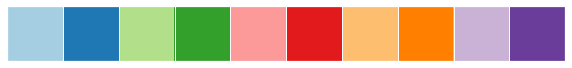

In [75]:
palette = sns.palplot(sns.color_palette("Paired", 10))

/opt/anaconda3/envs/sklearn-env/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
<ipython-input-77-f5f1913ae3c9>:7: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('CCLE_OC_TOMICS_n=44_k=9', dpi=1200, facecolor='w', edgecolor='w',
<ipython-input-77-f5f1913ae3c9>:7: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "frameon" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('CCLE_OC_TOMICS_n=44_k=9', dpi=1200, facecolor='w', edgecolor='w',


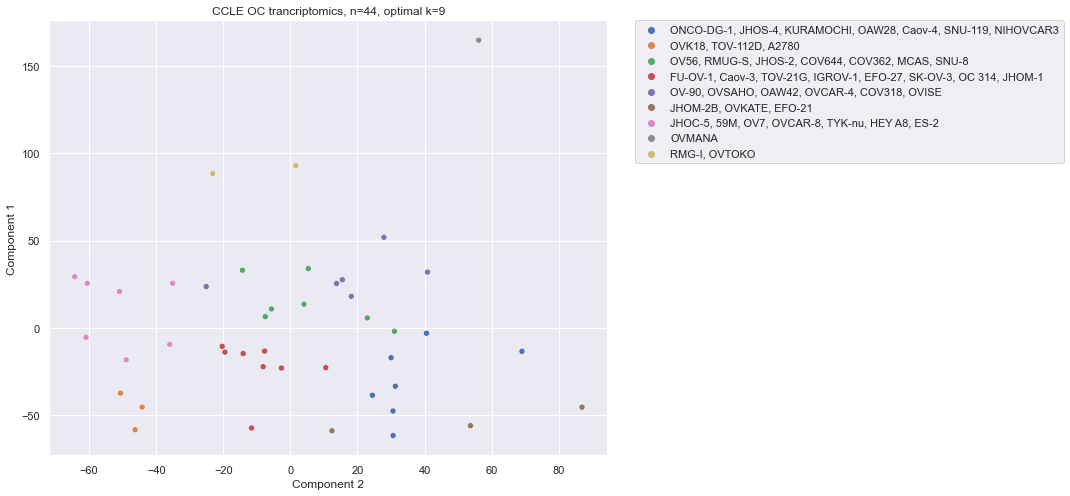

In [77]:
x_axis = df_segm_pca_kmeans['Component 2']
y_axis = df_segm_pca_kmeans['Component 1']
plt.figure(figsize = (10,8))
sns.scatterplot(x_axis, y_axis, hue = df_segm_pca_kmeans['Segment'], palette = palette)
plt.title('CCLE OC trancriptomics, n=44, optimal k=9')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.savefig('CCLE_OC_TOMICS_n=44_k=9', dpi=1200, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches='tight', pad_inches=0.1,
        frameon=None, metadata=None)
plt.show()

In [79]:
data.to_csv('CCLETomics_including_NIHOVCAR3.csv')

# Tomics, n=17, finding optimal k

In [188]:
n_17_tomics = pd.read_csv(r'/Users/katemeeson/Dropbox (The University of Manchester)/UNIMAN Ovarian Cancer Project/July August modelling/Tomics_Pomics_overlap_n17.csv', index_col = [0])
N, D = n_17_tomics.shape
print('Samples: %s, Proteins: %s'%(N, D))
n_17_tomics = n_17_tomics.dropna(axis=1, how='any', thresh=None, subset=None, inplace=False)
n_17_tomics

Samples: 17, Proteins: 16383


,TSPAN6 (ENSG00000000003),TNMD (ENSG00000000005),DPM1 (ENSG00000000419),SCYL3 (ENSG00000000457),C1orf112 (ENSG00000000460),FGR (ENSG00000000938),CFH (ENSG00000000971),FUCA2 (ENSG00000001036),GCLC (ENSG00000001084),NFYA (ENSG00000001167),...,TMEM216 (ENSG00000187049),RPS19BP1 (ENSG00000187051),TMPRSS11A (ENSG00000187054),TMEM262 (ENSG00000187066),C3orf70 (ENSG00000187068),TEAD1 (ENSG00000187079),OR2AK2 (ENSG00000187080),PLCD1 (ENSG00000187091),CCK (ENSG00000187094),ENTPD5 (ENSG00000187097)
OC Broad IDs,,,,,,,,,,,,,,,,,,,,,
A2780,6.524816,1.790772,6.871104,2.803227,4.480265,0.042644,8.082096,4.370862,3.849999,4.496974,...,3.678072,6.619853,0.000000,0.238787,0.584963,4.801676,0.000000,2.204767,0.084064,2.531069
Caov-3,5.702103,0.000000,7.109778,1.773996,3.505891,0.084064,2.885574,6.671576,6.387673,5.299391,...,4.685380,6.788816,0.042644,0.807355,0.485427,5.454834,0.042644,1.875780,0.594549,2.189034
COV362,3.964399,0.042644,6.135248,1.867896,2.678072,0.000000,5.833902,4.969012,4.500165,4.392317,...,4.214125,5.167920,0.028569,0.910733,0.014355,4.887525,0.000000,2.601697,2.695994,2.724650
FU-OV-1,5.932864,0.604071,6.687341,1.959770,3.896272,0.028569,0.163499,5.047015,4.301588,4.521051,...,3.990047,5.919340,0.000000,0.773996,0.042644,5.700162,0.000000,1.014355,0.150560,2.889474
HEY A8,4.410748,0.000000,7.077029,1.937344,3.809414,0.000000,0.505891,6.069960,4.341986,3.363171,...,3.203201,6.118526,0.000000,0.575312,0.454176,4.207893,0.000000,1.443607,0.000000,2.735522
IGROV-1,4.842476,0.000000,6.193969,2.046142,2.885574,0.056584,0.432959,6.395577,4.014355,4.774524,...,4.291309,6.303050,0.028569,0.641546,0.000000,5.316146,0.000000,1.232661,0.056584,3.382667
JHOS-2,6.512069,0.000000,6.384050,2.636915,4.448240,0.014355,3.392317,5.358256,3.382667,3.941106,...,4.507795,6.358256,0.028569,0.713696,0.084064,5.194954,0.000000,2.849999,1.416840,2.653060
KURAMOCHI,4.693208,0.189034,6.848623,2.641546,3.557042,0.111031,2.446256,5.174726,3.289834,4.553361,...,4.251719,5.647890,0.014355,0.992768,0.014355,5.165510,0.000000,2.531069,0.000000,2.599318
NIHOVCAR3,5.823495,0.000000,7.369292,2.100978,4.221877,0.042644,0.910733,5.672991,4.676380,4.013462,...,4.328406,6.117695,0.056584,1.035624,0.070389,5.652773,0.000000,2.286881,2.150560,2.737687


# Tomics, n=17 elbow plot

In [85]:
data = n_17_tomics

In [86]:
scaler = StandardScaler()
segmentation_std = scaler.fit_transform(data)
pca = PCA(n_components = 3)
pca.fit(segmentation_std)
scores_pca = pca.transform(segmentation_std)
pca.transform(segmentation_std)

array([[ 77.42804891, -19.51514315,  79.23192   ],
       [-35.0969565 , -26.75421155, -16.13768446],
       [ -9.76318415,  -5.03480621, -25.34245203],
       [ 18.78820225, -23.127457  ,  23.81997542],
       [ 57.40125037,  -6.71189319, -74.49011687],
       [ 31.0796836 ,   4.49484019,  36.58701062],
       [-40.70597597,  -6.33608139, -56.42937173],
       [-41.30224932, -15.94694024,  35.03340691],
       [-32.65215732, -56.13024057,  35.15096675],
       [  6.86678643,  -1.89021837, -47.49506884],
       [ -9.42197338, 126.4635468 ,  35.78023697],
       [-37.44882227,  20.68524147,  -9.44446598],
       [ 46.50737051, -21.89212187, -18.98001305],
       [-34.89653053,  -2.24930624,  19.02126639],
       [-15.06360669,  62.36346236, -17.14465927],
       [-58.62945195, -33.18252151,  17.90207779],
       [ 76.909566  ,   4.76385046, -17.06302862]])

Optimal number of clusters 5


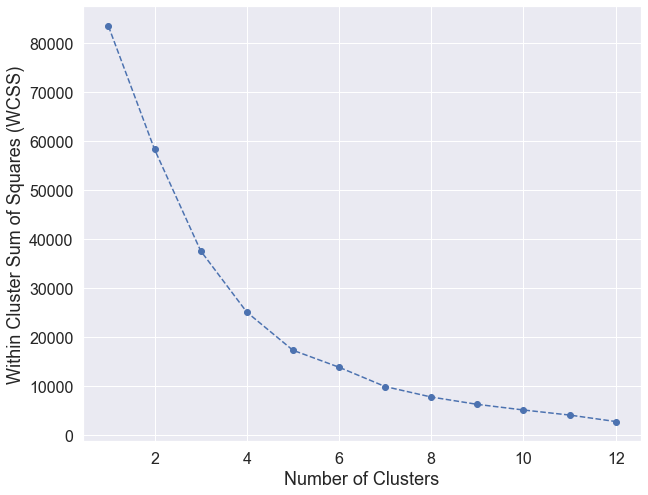

In [88]:
wcss = []
max_clusters = 13
for i in range(1, max_clusters):
    kmeans_pca = KMeans(i, init='k-means++', random_state=42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

n_clusters = KneeLocator([i for i in range(1, max_clusters)], wcss, curve='convex', direction='decreasing').knee
print("Optimal number of clusters", n_clusters)

fig = plt.figure(figsize=(10,8))
plt.plot(range(1, 13), wcss, marker='o', linestyle='--')
# plt.vlines(n_clusters, ymin=0, ymax=max(wcss), linestyles='dashed')
plt.xlabel('Number of Clusters', fontsize=18)
plt.ylabel('Within Cluster Sum of Squares (WCSS)', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

# Tomics, n=17, gap statistic

In [89]:
df = gap_resids(range(10),12)
df

,cluster number,iteration_0,iteration_1,iteration_2,iteration_3,iteration_4,iteration_5,iteration_6,iteration_7,iteration_8,iteration_9
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,-0.002735,-0.006654,-0.000065,0.001662,0.002592,0.001793,-0.018479,0.005027,0.007113,0.013650
4,4,0.003491,0.003075,0.001928,-0.009307,0.006094,-0.015851,0.012933,-0.003347,0.001185,-0.020494
5,5,-0.004114,-0.003109,0.007854,-0.006638,-0.010823,0.008518,0.005854,-0.001844,-0.025293,-0.011592
6,6,-0.001900,0.015686,-0.024714,0.006190,-0.026959,0.004516,0.000753,-0.009550,0.001321,0.002694
7,7,-0.008830,-0.002902,0.004561,0.007655,0.020154,-0.005663,-0.006028,-0.008001,0.008561,0.014872
8,8,0.020725,-0.011583,0.010377,0.017223,0.021638,0.012283,0.012452,0.021074,0.012898,0.010653
9,9,0.011410,0.012804,0.014043,-0.004773,0.003511,0.014324,0.012653,0.014165,0.012799,0.008679


In [106]:
df_2 = df.iloc[3:11, :]
df_2

,cluster number,iteration_0,iteration_1,iteration_2,iteration_3,iteration_4,iteration_5,iteration_6,iteration_7,iteration_8,iteration_9
3,3,-0.002735,-0.006654,-0.000065,0.001662,0.002592,0.001793,-0.018479,0.005027,0.007113,0.013650
4,4,0.003491,0.003075,0.001928,-0.009307,0.006094,-0.015851,0.012933,-0.003347,0.001185,-0.020494
5,5,-0.004114,-0.003109,0.007854,-0.006638,-0.010823,0.008518,0.005854,-0.001844,-0.025293,-0.011592
6,6,-0.001900,0.015686,-0.024714,0.006190,-0.026959,0.004516,0.000753,-0.009550,0.001321,0.002694
7,7,-0.008830,-0.002902,0.004561,0.007655,0.020154,-0.005663,-0.006028,-0.008001,0.008561,0.014872
8,8,0.020725,-0.011583,0.010377,0.017223,0.021638,0.012283,0.012452,0.021074,0.012898,0.010653
9,9,0.011410,0.012804,0.014043,-0.004773,0.003511,0.014324,0.012653,0.014165,0.012799,0.008679
10,10,-0.018047,-0.007317,-0.013982,-0.012012,-0.016206,-0.019920,-0.020138,-0.017525,-0.018585,-0.018461


In [111]:
df_2.iloc[7,1:11]

iteration_0   -0.018047
iteration_1   -0.007317
iteration_2   -0.013982
iteration_3   -0.012012
iteration_4   -0.016206
iteration_5   -0.019920
iteration_6   -0.020138
iteration_7   -0.017525
iteration_8   -0.018585
iteration_9   -0.018461
Name: 10, dtype: float64

In [112]:
sums = []
for n in range(8):
    sum_of_iteration = sum(df_2.iloc[n,1:11])
    sums.append(sum_of_iteration)
    
sums

[0.003903899444639869,
 -0.020294283440872363,
 -0.041188229365332285,
 -0.03196346192548605,
 0.024379319018564827,
 0.1277392534350903,
 0.09961693513555958,
 -0.16219343230213545]

In [113]:
df_2['sums'] = sums
df_2

<ipython-input-113-455ec691647b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['sums'] = sums


,cluster number,iteration_0,iteration_1,iteration_2,iteration_3,iteration_4,iteration_5,iteration_6,iteration_7,iteration_8,iteration_9,sums
3,3,-0.002735,-0.006654,-0.000065,0.001662,0.002592,0.001793,-0.018479,0.005027,0.007113,0.013650,0.003904
4,4,0.003491,0.003075,0.001928,-0.009307,0.006094,-0.015851,0.012933,-0.003347,0.001185,-0.020494,-0.020294
5,5,-0.004114,-0.003109,0.007854,-0.006638,-0.010823,0.008518,0.005854,-0.001844,-0.025293,-0.011592,-0.041188
6,6,-0.001900,0.015686,-0.024714,0.006190,-0.026959,0.004516,0.000753,-0.009550,0.001321,0.002694,-0.031963
7,7,-0.008830,-0.002902,0.004561,0.007655,0.020154,-0.005663,-0.006028,-0.008001,0.008561,0.014872,0.024379
8,8,0.020725,-0.011583,0.010377,0.017223,0.021638,0.012283,0.012452,0.021074,0.012898,0.010653,0.127739
9,9,0.011410,0.012804,0.014043,-0.004773,0.003511,0.014324,0.012653,0.014165,0.012799,0.008679,0.099617
10,10,-0.018047,-0.007317,-0.013982,-0.012012,-0.016206,-0.019920,-0.020138,-0.017525,-0.018585,-0.018461,-0.162193


Text(0, 0.5, 'Residual for Gap statistic across iterations')

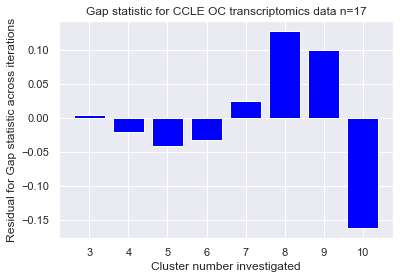

In [114]:
sum_of_gap_resids = df_2['sums']
clusters_investigated = []
for n in range(3,11):
    clusters_investigated.append(n)
clusters_investigated = tuple(clusters_investigated)
x_pos = np.arange(len(clusters_investigated))
gap_plot = plt.bar(x_pos, sum_of_gap_resids, color = 'blue')
plt.xticks(x_pos, clusters_investigated)
plt.title('Gap statistic for CCLE OC transcriptomics data n=17')
plt.xlabel('Cluster number investigated')
plt.ylabel('Residual for Gap statistic across iterations')

# Tomics, n=17, silhouette plot

In [115]:
column_names = ["cluster number", "silhouette score"]

df = pd.DataFrame(columns = column_names)
df

,cluster number,silhouette score


In [116]:
X_data = pca.transform(segmentation_std)
X_data

array([[ 77.42804891, -19.51514315,  79.23192   ],
       [-35.0969565 , -26.75421155, -16.13768446],
       [ -9.76318415,  -5.03480621, -25.34245203],
       [ 18.78820225, -23.127457  ,  23.81997542],
       [ 57.40125037,  -6.71189319, -74.49011687],
       [ 31.0796836 ,   4.49484019,  36.58701062],
       [-40.70597597,  -6.33608139, -56.42937173],
       [-41.30224932, -15.94694024,  35.03340691],
       [-32.65215732, -56.13024057,  35.15096675],
       [  6.86678643,  -1.89021837, -47.49506884],
       [ -9.42197338, 126.4635468 ,  35.78023697],
       [-37.44882227,  20.68524147,  -9.44446598],
       [ 46.50737051, -21.89212187, -18.98001305],
       [-34.89653053,  -2.24930624,  19.02126639],
       [-15.06360669,  62.36346236, -17.14465927],
       [-58.62945195, -33.18252151,  17.90207779],
       [ 76.909566  ,   4.76385046, -17.06302862]])

For n_clusters = 3 The average silhouette_score is : 0.3079195978981892


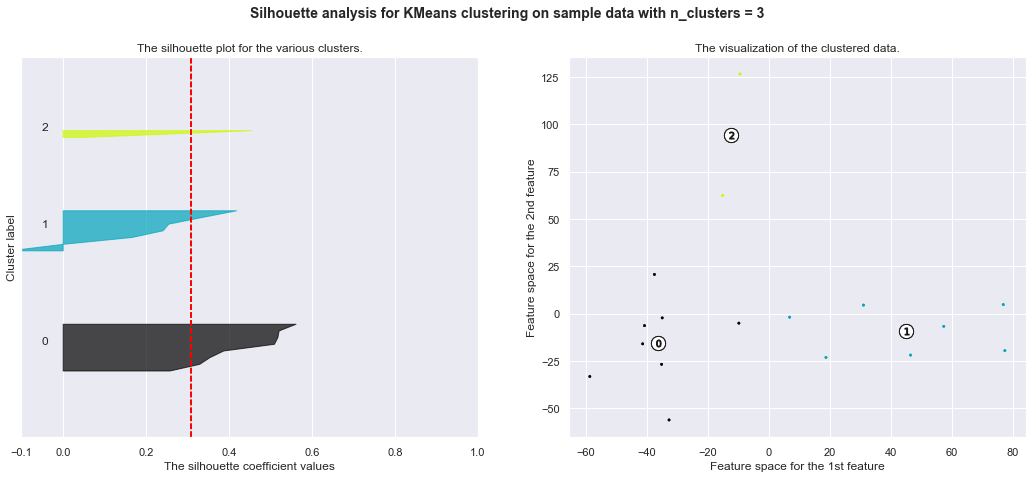

For n_clusters = 4 The average silhouette_score is : 0.328686079857663


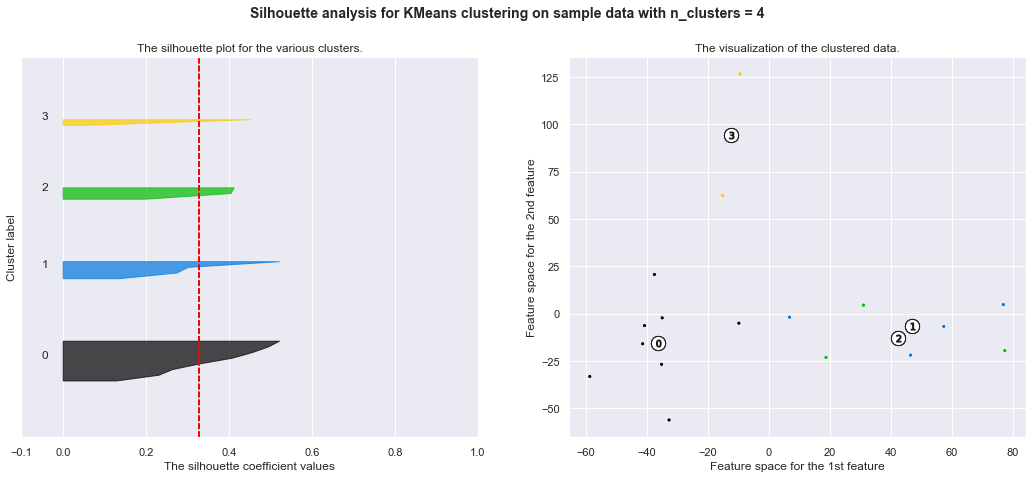

For n_clusters = 5 The average silhouette_score is : 0.32306653804339486


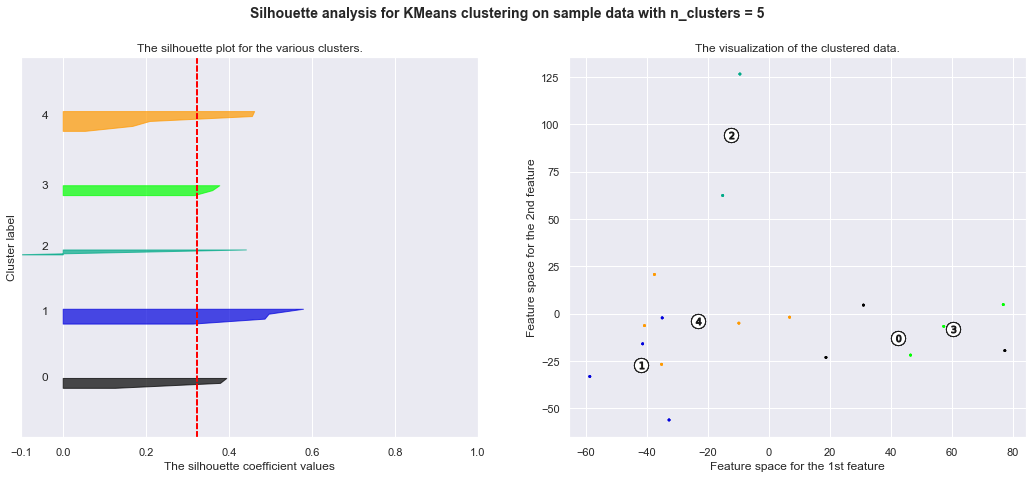

For n_clusters = 6 The average silhouette_score is : 0.31180169913943806


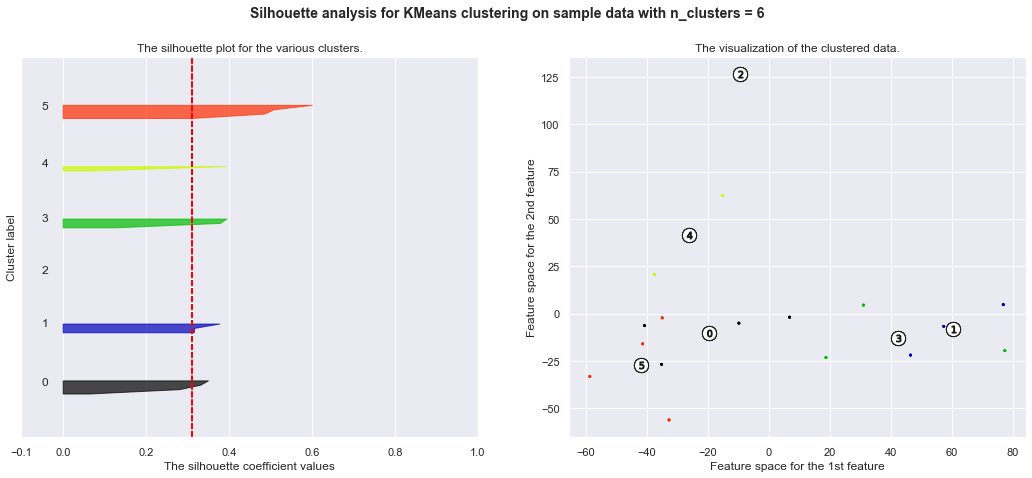

For n_clusters = 7 The average silhouette_score is : 0.2947749699333171


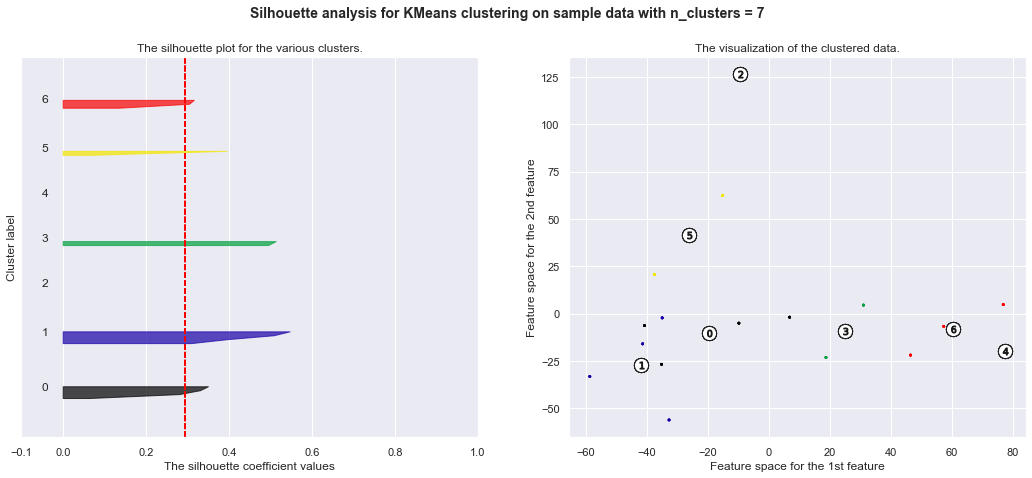

For n_clusters = 8 The average silhouette_score is : 0.2756850281988882


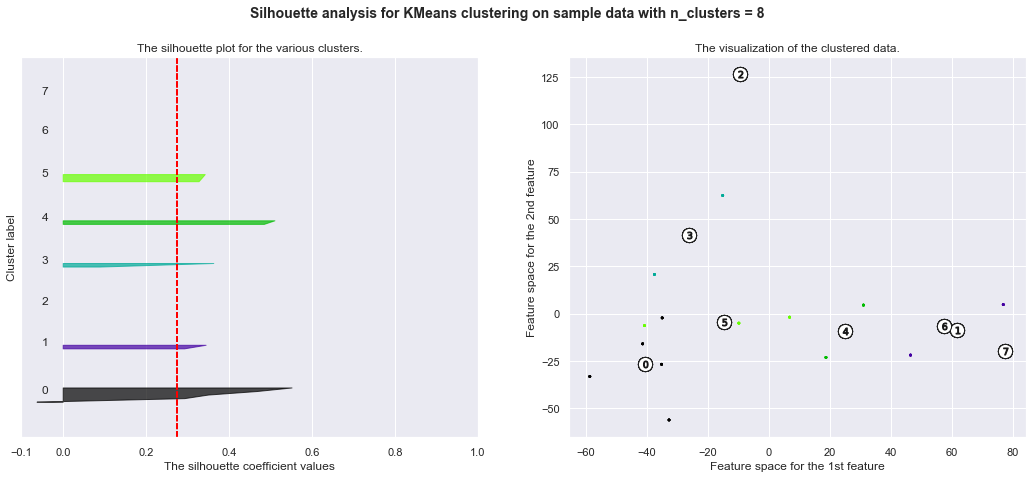

For n_clusters = 9 The average silhouette_score is : 0.2631111380722322


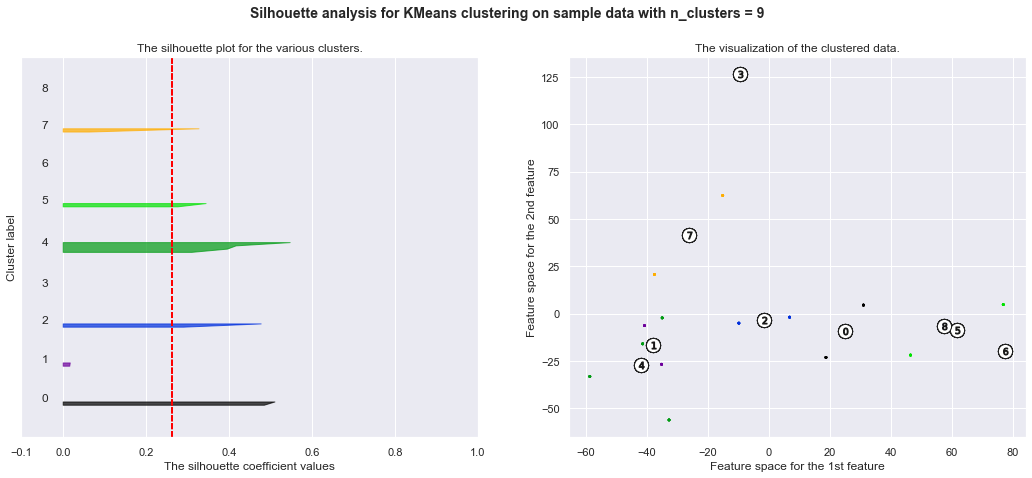

In [117]:
n_cluster_list = []
s_score_list = []

range_of_clusters = [3,4,5,6,7,8,9]

for n_clusters in range_of_clusters:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X_data) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X_data)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
    silhouette_avg = silhouette_score(X_data, cluster_labels)
    print("For n_clusters =",n_clusters,"The average silhouette_score is :",silhouette_avg,)

    n_cluster_list.append(n_clusters)
    s_score_list.append(silhouette_avg)

        # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_data, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),0,ith_cluster_silhouette_values,facecolor=color,edgecolor=color,alpha=0.7,)

            # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(
            X_data[:, 0], X_data[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
        )

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(
            centers[:, 0],
            centers[:, 1],
            marker="o",
            c="white",
            alpha=1,
            s=200,
            edgecolor="k",
        )

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")
        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")
        plt.suptitle("Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"% n_clusters,fontsize=14,fontweight="bold",)

    plt.show()

In [118]:
print(n_cluster_list)
print(s_score_list)

[3, 4, 5, 6, 7, 8, 9]
[0.3079195978981892, 0.328686079857663, 0.32306653804339486, 0.31180169913943806, 0.2947749699333171, 0.2756850281988882, 0.2631111380722322]


In [119]:
df['cluster number'] = n_cluster_list
df['silhouette score'] = s_score_list
df = df.set_index('cluster number')
df

,silhouette score
cluster number,
3,0.307920
4,0.328686
5,0.323067
6,0.311802
7,0.294775
8,0.275685
9,0.263111


Text(0.5, 1.0, 'Accuracy of K-means clusters Tomics')

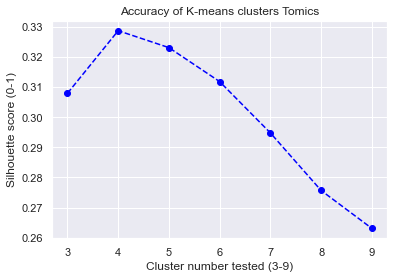

In [120]:
plt.plot(n_cluster_list, s_score_list, linestyle='--', marker='o', color='blue')
plt.xlabel('Cluster number tested (3-9)')
plt.ylabel('Silhouette score (0-1)')
plt.title('Accuracy of K-means clusters Tomics')

# Tomics, n=17, david bouldin score. 

In [121]:
data

,TSPAN6 (ENSG00000000003),TNMD (ENSG00000000005),DPM1 (ENSG00000000419),SCYL3 (ENSG00000000457),C1orf112 (ENSG00000000460),FGR (ENSG00000000938),CFH (ENSG00000000971),FUCA2 (ENSG00000001036),GCLC (ENSG00000001084),NFYA (ENSG00000001167),...,TMEM216 (ENSG00000187049),RPS19BP1 (ENSG00000187051),TMPRSS11A (ENSG00000187054),TMEM262 (ENSG00000187066),C3orf70 (ENSG00000187068),TEAD1 (ENSG00000187079),OR2AK2 (ENSG00000187080),PLCD1 (ENSG00000187091),CCK (ENSG00000187094),ENTPD5 (ENSG00000187097)
OC Broad IDs,,,,,,,,,,,,,,,,,,,,,
A2780,6.524816,1.790772,6.871104,2.803227,4.480265,0.042644,8.082096,4.370862,3.849999,4.496974,...,3.678072,6.619853,0.000000,0.238787,0.584963,4.801676,0.000000,2.204767,0.084064,2.531069
Caov-3,5.702103,0.000000,7.109778,1.773996,3.505891,0.084064,2.885574,6.671576,6.387673,5.299391,...,4.685380,6.788816,0.042644,0.807355,0.485427,5.454834,0.042644,1.875780,0.594549,2.189034
COV362,3.964399,0.042644,6.135248,1.867896,2.678072,0.000000,5.833902,4.969012,4.500165,4.392317,...,4.214125,5.167920,0.028569,0.910733,0.014355,4.887525,0.000000,2.601697,2.695994,2.724650
FU-OV-1,5.932864,0.604071,6.687341,1.959770,3.896272,0.028569,0.163499,5.047015,4.301588,4.521051,...,3.990047,5.919340,0.000000,0.773996,0.042644,5.700162,0.000000,1.014355,0.150560,2.889474
HEY A8,4.410748,0.000000,7.077029,1.937344,3.809414,0.000000,0.505891,6.069960,4.341986,3.363171,...,3.203201,6.118526,0.000000,0.575312,0.454176,4.207893,0.000000,1.443607,0.000000,2.735522
IGROV-1,4.842476,0.000000,6.193969,2.046142,2.885574,0.056584,0.432959,6.395577,4.014355,4.774524,...,4.291309,6.303050,0.028569,0.641546,0.000000,5.316146,0.000000,1.232661,0.056584,3.382667
JHOS-2,6.512069,0.000000,6.384050,2.636915,4.448240,0.014355,3.392317,5.358256,3.382667,3.941106,...,4.507795,6.358256,0.028569,0.713696,0.084064,5.194954,0.000000,2.849999,1.416840,2.653060
KURAMOCHI,4.693208,0.189034,6.848623,2.641546,3.557042,0.111031,2.446256,5.174726,3.289834,4.553361,...,4.251719,5.647890,0.014355,0.992768,0.014355,5.165510,0.000000,2.531069,0.000000,2.599318
NIHOVCAR3,5.823495,0.000000,7.369292,2.100978,4.221877,0.042644,0.910733,5.672991,4.676380,4.013462,...,4.328406,6.117695,0.056584,1.035624,0.070389,5.652773,0.000000,2.286881,2.150560,2.737687


In [122]:
column_names = ["cluster number", "DB score"]

df_db = pd.DataFrame(columns = column_names)
df_db['cluster number'] = range(3,10)
df_db

,cluster number,DB score
0,3,NaN
1,4,NaN
2,5,NaN
3,6,NaN
4,7,NaN
5,8,NaN
6,9,NaN


In [123]:
def resid_regression_db_score(number_of_iterations):
    for n in number_of_iterations:
        scores = []
        centers = []
        for num in range(3,10):
            centers.append(num)
        for center in centers:
            scores.append(get_kmeans_score(data, center))
        
        df_db['cluster number'] = centers
        df_db['DB score'] = scores
        
        model = ols('scores ~ centers', data=df_db).fit()
        
        gap_stat_model = ols('scores ~ centers', data=df_db).fit()
        resids = gap_stat_model.resid
        column_name = 'iteration_' + str(n)
        df_db_it[column_name] = resids
        
    return(df_db_it)

In [124]:
resid_regression_db_score(range(50))

,cluster number,iteration_0,iteration_1,iteration_2,iteration_3,iteration_4,iteration_5,iteration_6,iteration_7,iteration_8,...,iteration_41,iteration_42,iteration_43,iteration_44,iteration_45,iteration_46,iteration_47,iteration_48,iteration_49,sums
0,2,-0.008758,0.173983,0.122961,0.303862,-0.033599,-0.163229,-0.060173,0.014339,0.175735,...,0.104819,0.160141,0.333726,0.115334,0.000503,0.250408,-0.082048,0.234510,0.295393,12.958106
1,3,0.046888,-0.101068,0.178993,-0.223038,-0.107631,0.158681,0.110047,-0.004084,-0.047974,...,-0.119737,-0.180920,-0.136781,0.015451,0.064447,-0.045045,0.125461,-0.169389,-0.219599,-0.329889
2,4,-0.132905,-0.190254,-0.231945,-0.027603,0.194735,0.049991,0.169194,-0.031571,-0.059732,...,0.030023,-0.013404,-0.159782,-0.207261,0.179831,-0.258370,-0.000573,0.071655,-0.060775,-4.539108
3,5,0.115052,0.090382,-0.278794,-0.198752,0.054806,0.065612,-0.227891,0.044465,-0.223652,...,-0.022263,0.098246,-0.260523,0.032686,-0.389005,-0.107353,0.066134,-0.327180,-0.218987,-0.874139
4,6,0.034671,-0.056787,0.030729,0.063825,-0.086517,-0.067934,-0.122411,0.029479,0.081124,...,-0.034955,-0.187003,0.000923,0.051873,0.034912,0.010533,-0.200127,0.034679,0.080685,-1.011289
5,7,-0.064768,0.064882,0.069973,-0.128961,-0.030574,-0.074965,0.062523,-0.131681,-0.066913,...,-0.013621,0.076636,0.100397,-0.142015,0.052613,0.057248,0.069127,0.065446,0.064332,-4.199113
6,8,0.009820,0.018861,0.108083,0.210668,0.008780,0.031844,0.068711,0.079053,0.141409,...,0.055735,0.046304,0.122040,0.133933,0.056699,0.092578,0.022026,0.090278,0.058952,-4.012527
7,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-4.250995
8,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.472254
9,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.191985


In [134]:
df_db_it2 = df_db_it[0:7]
df_db_it2

,cluster number,iteration_0,iteration_1,iteration_2,iteration_3,iteration_4,iteration_5,iteration_6,iteration_7,iteration_8,...,iteration_41,iteration_42,iteration_43,iteration_44,iteration_45,iteration_46,iteration_47,iteration_48,iteration_49,sums
0,2,-0.008758,0.173983,0.122961,0.303862,-0.033599,-0.163229,-0.060173,0.014339,0.175735,...,0.104819,0.160141,0.333726,0.115334,0.000503,0.250408,-0.082048,0.234510,0.295393,12.958106
1,3,0.046888,-0.101068,0.178993,-0.223038,-0.107631,0.158681,0.110047,-0.004084,-0.047974,...,-0.119737,-0.180920,-0.136781,0.015451,0.064447,-0.045045,0.125461,-0.169389,-0.219599,-0.329889
2,4,-0.132905,-0.190254,-0.231945,-0.027603,0.194735,0.049991,0.169194,-0.031571,-0.059732,...,0.030023,-0.013404,-0.159782,-0.207261,0.179831,-0.258370,-0.000573,0.071655,-0.060775,-4.539108
3,5,0.115052,0.090382,-0.278794,-0.198752,0.054806,0.065612,-0.227891,0.044465,-0.223652,...,-0.022263,0.098246,-0.260523,0.032686,-0.389005,-0.107353,0.066134,-0.327180,-0.218987,-0.874139
4,6,0.034671,-0.056787,0.030729,0.063825,-0.086517,-0.067934,-0.122411,0.029479,0.081124,...,-0.034955,-0.187003,0.000923,0.051873,0.034912,0.010533,-0.200127,0.034679,0.080685,-1.011289
5,7,-0.064768,0.064882,0.069973,-0.128961,-0.030574,-0.074965,0.062523,-0.131681,-0.066913,...,-0.013621,0.076636,0.100397,-0.142015,0.052613,0.057248,0.069127,0.065446,0.064332,-4.199113
6,8,0.009820,0.018861,0.108083,0.210668,0.008780,0.031844,0.068711,0.079053,0.141409,...,0.055735,0.046304,0.122040,0.133933,0.056699,0.092578,0.022026,0.090278,0.058952,-4.012527


In [135]:
sums_db = []
for n in range(0,7):
    sum_of_iteration_db = sum(df_db_it2.iloc[n,1:51])
    sums_db.append(sum_of_iteration_db)
    
sums_db

[5.196588158037057,
 -1.5265281017878447,
 -2.493459778350468,
 -3.4805991925653803,
 -1.7519393933686207,
 0.37262703855242607,
 3.683311269482904]

In [137]:
df_db_it2['sums'] = sums_db
df_db_it2

<ipython-input-137-ae0401782e67>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_db_it2['sums'] = sums_db


,cluster number,iteration_0,iteration_1,iteration_2,iteration_3,iteration_4,iteration_5,iteration_6,iteration_7,iteration_8,...,iteration_41,iteration_42,iteration_43,iteration_44,iteration_45,iteration_46,iteration_47,iteration_48,iteration_49,sums
0,2,-0.008758,0.173983,0.122961,0.303862,-0.033599,-0.163229,-0.060173,0.014339,0.175735,...,0.104819,0.160141,0.333726,0.115334,0.000503,0.250408,-0.082048,0.234510,0.295393,5.196588
1,3,0.046888,-0.101068,0.178993,-0.223038,-0.107631,0.158681,0.110047,-0.004084,-0.047974,...,-0.119737,-0.180920,-0.136781,0.015451,0.064447,-0.045045,0.125461,-0.169389,-0.219599,-1.526528
2,4,-0.132905,-0.190254,-0.231945,-0.027603,0.194735,0.049991,0.169194,-0.031571,-0.059732,...,0.030023,-0.013404,-0.159782,-0.207261,0.179831,-0.258370,-0.000573,0.071655,-0.060775,-2.493460
3,5,0.115052,0.090382,-0.278794,-0.198752,0.054806,0.065612,-0.227891,0.044465,-0.223652,...,-0.022263,0.098246,-0.260523,0.032686,-0.389005,-0.107353,0.066134,-0.327180,-0.218987,-3.480599
4,6,0.034671,-0.056787,0.030729,0.063825,-0.086517,-0.067934,-0.122411,0.029479,0.081124,...,-0.034955,-0.187003,0.000923,0.051873,0.034912,0.010533,-0.200127,0.034679,0.080685,-1.751939
5,7,-0.064768,0.064882,0.069973,-0.128961,-0.030574,-0.074965,0.062523,-0.131681,-0.066913,...,-0.013621,0.076636,0.100397,-0.142015,0.052613,0.057248,0.069127,0.065446,0.064332,0.372627
6,8,0.009820,0.018861,0.108083,0.210668,0.008780,0.031844,0.068711,0.079053,0.141409,...,0.055735,0.046304,0.122040,0.133933,0.056699,0.092578,0.022026,0.090278,0.058952,3.683311


<BarContainer object of 7 artists>

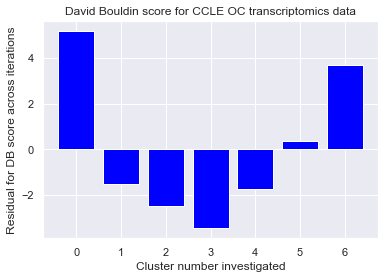

In [139]:
sum_of_db_resids = df_db_it2['sums']
clusters_investigated_db = []
for n in range(0,7):
    clusters_investigated_db.append(n)
clusters_investigated_db = tuple(clusters_investigated_db)
x_pos_db = np.arange(len(clusters_investigated_db))
db_plot = plt.bar(x_pos_db, sum_of_db_resids, color = 'blue')
plt.xticks(x_pos_db, clusters_investigated_db)
plt.title('David Bouldin score for CCLE OC transcriptomics data')
plt.xlabel('Cluster number investigated')
plt.ylabel('Residual for DB score across iterations')
db_plot

In [ ]:
sum_of_db_resids = df_db_it['sums']
clusters_investigated_db = []
for n in range(2,12):
    clusters_investigated_db.append(n)
clusters_investigated_db = tuple(clusters_investigated_db)
x_pos_db = np.arange(len(clusters_investigated_db))
db_plot = plt.bar(x_pos_db, sum_of_db_resids, color = 'blue')
plt.xticks(x_pos_db, clusters_investigated_db)
plt.title('David Bouldin score for CCLE OC transcriptomics data')
plt.xlabel('Cluster number investigated')
plt.ylabel('Residual for DB score across iterations')
db_plot

# Tomics, n=17, optimal k=5, K-means/PCA plotting.

In [140]:
data

,TSPAN6 (ENSG00000000003),TNMD (ENSG00000000005),DPM1 (ENSG00000000419),SCYL3 (ENSG00000000457),C1orf112 (ENSG00000000460),FGR (ENSG00000000938),CFH (ENSG00000000971),FUCA2 (ENSG00000001036),GCLC (ENSG00000001084),NFYA (ENSG00000001167),...,TMEM216 (ENSG00000187049),RPS19BP1 (ENSG00000187051),TMPRSS11A (ENSG00000187054),TMEM262 (ENSG00000187066),C3orf70 (ENSG00000187068),TEAD1 (ENSG00000187079),OR2AK2 (ENSG00000187080),PLCD1 (ENSG00000187091),CCK (ENSG00000187094),ENTPD5 (ENSG00000187097)
OC Broad IDs,,,,,,,,,,,,,,,,,,,,,
A2780,6.524816,1.790772,6.871104,2.803227,4.480265,0.042644,8.082096,4.370862,3.849999,4.496974,...,3.678072,6.619853,0.000000,0.238787,0.584963,4.801676,0.000000,2.204767,0.084064,2.531069
Caov-3,5.702103,0.000000,7.109778,1.773996,3.505891,0.084064,2.885574,6.671576,6.387673,5.299391,...,4.685380,6.788816,0.042644,0.807355,0.485427,5.454834,0.042644,1.875780,0.594549,2.189034
COV362,3.964399,0.042644,6.135248,1.867896,2.678072,0.000000,5.833902,4.969012,4.500165,4.392317,...,4.214125,5.167920,0.028569,0.910733,0.014355,4.887525,0.000000,2.601697,2.695994,2.724650
FU-OV-1,5.932864,0.604071,6.687341,1.959770,3.896272,0.028569,0.163499,5.047015,4.301588,4.521051,...,3.990047,5.919340,0.000000,0.773996,0.042644,5.700162,0.000000,1.014355,0.150560,2.889474
HEY A8,4.410748,0.000000,7.077029,1.937344,3.809414,0.000000,0.505891,6.069960,4.341986,3.363171,...,3.203201,6.118526,0.000000,0.575312,0.454176,4.207893,0.000000,1.443607,0.000000,2.735522
IGROV-1,4.842476,0.000000,6.193969,2.046142,2.885574,0.056584,0.432959,6.395577,4.014355,4.774524,...,4.291309,6.303050,0.028569,0.641546,0.000000,5.316146,0.000000,1.232661,0.056584,3.382667
JHOS-2,6.512069,0.000000,6.384050,2.636915,4.448240,0.014355,3.392317,5.358256,3.382667,3.941106,...,4.507795,6.358256,0.028569,0.713696,0.084064,5.194954,0.000000,2.849999,1.416840,2.653060
KURAMOCHI,4.693208,0.189034,6.848623,2.641546,3.557042,0.111031,2.446256,5.174726,3.289834,4.553361,...,4.251719,5.647890,0.014355,0.992768,0.014355,5.165510,0.000000,2.531069,0.000000,2.599318
NIHOVCAR3,5.823495,0.000000,7.369292,2.100978,4.221877,0.042644,0.910733,5.672991,4.676380,4.013462,...,4.328406,6.117695,0.056584,1.035624,0.070389,5.652773,0.000000,2.286881,2.150560,2.737687


In [141]:
scaler = StandardScaler()
segmentation_std = scaler.fit_transform(data)
pca = PCA(n_components = 3)
pca.fit(segmentation_std)
scores_pca = pca.transform(segmentation_std)
pca.transform(segmentation_std)

array([[ 77.54256553, -20.61171915,  78.78832766],
       [-35.32966431, -26.41107044, -15.47257259],
       [-10.24302409,  -4.36589622, -24.32084231],
       [ 18.47947878, -22.72673719,  23.52551502],
       [ 57.76019671,  -6.33085103, -74.56998785],
       [ 30.73078527,   3.54653839,  36.99154993],
       [-41.05596712,  -9.26635422, -57.08538298],
       [-41.17087906, -14.60094191,  34.67259812],
       [-32.20939671, -54.43429285,  35.60829612],
       [  6.97283924,  -1.06686144, -47.64810386],
       [ -9.31808442, 126.68894717,  36.01323179],
       [-36.89808606,  21.20831713,  -8.60617924],
       [ 46.53601867, -21.89068913, -19.50643341],
       [-34.97830777,  -3.36565214,  18.28331261],
       [-15.00275548,  62.89319381, -18.23372241],
       [-58.66207833, -34.14016361,  17.96753807],
       [ 76.84635915,   4.87423282, -16.40714467]])

In [142]:
PCA_EV = pca.explained_variance_ratio_
print('Explained variance: ', PCA_EV)
print('Principal component 1: ', PCA_EV[0]*100)
print('Principal component 2: ', PCA_EV[1]*100)
print('Principal component 3: ', PCA_EV[2]*100)

Explained variance:  [0.11358355 0.09976583 0.0939562 ]
Principal component 1:  11.358354596452964
Principal component 2:  9.976582753972359
Principal component 3:  9.395619821017988


In [143]:
wcss = []
max_clusters = 10
for i in range(1, max_clusters):
    kmeans_pca = KMeans(i, init='k-means++', random_state=42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)
    
optimal_cluster_number = 5
kmeans_pca = KMeans(n_clusters = optimal_cluster_number, init = 'k-means++', random_state = 42)
kmeans_pca.fit(scores_pca)
labels = kmeans_pca.predict(scores_pca)

In [144]:
kmeans_pca = KMeans(n_clusters=5, init='k-means++', random_state=42)
kmeans_pca.fit(scores_pca)
data['Cluster'] = kmeans_pca.labels_
data['Cluster']

OC Broad IDs
A2780        4
Caov-3       0
COV362       0
FU-OV-1      4
HEY A8       1
IGROV-1      4
JHOS-2       0
KURAMOCHI    2
NIHOVCAR3    2
OV56         0
OV-90        3
OVCAR-4      0
OVCAR-8      1
OVSAHO       2
RMUG-S       3
SNU-119      2
TYK-nu       1
Name: Cluster, dtype: int32

In [145]:
data_sorted = data.sort_values(by=['Cluster'])
data_sorted

,TSPAN6 (ENSG00000000003),TNMD (ENSG00000000005),DPM1 (ENSG00000000419),SCYL3 (ENSG00000000457),C1orf112 (ENSG00000000460),FGR (ENSG00000000938),CFH (ENSG00000000971),FUCA2 (ENSG00000001036),GCLC (ENSG00000001084),NFYA (ENSG00000001167),...,RPS19BP1 (ENSG00000187051),TMPRSS11A (ENSG00000187054),TMEM262 (ENSG00000187066),C3orf70 (ENSG00000187068),TEAD1 (ENSG00000187079),OR2AK2 (ENSG00000187080),PLCD1 (ENSG00000187091),CCK (ENSG00000187094),ENTPD5 (ENSG00000187097),Cluster
OC Broad IDs,,,,,,,,,,,,,,,,,,,,,
Caov-3,5.702103,0.000000,7.109778,1.773996,3.505891,0.084064,2.885574,6.671576,6.387673,5.299391,...,6.788816,0.042644,0.807355,0.485427,5.454834,0.042644,1.875780,0.594549,2.189034,0
COV362,3.964399,0.042644,6.135248,1.867896,2.678072,0.000000,5.833902,4.969012,4.500165,4.392317,...,5.167920,0.028569,0.910733,0.014355,4.887525,0.000000,2.601697,2.695994,2.724650,0
JHOS-2,6.512069,0.000000,6.384050,2.636915,4.448240,0.014355,3.392317,5.358256,3.382667,3.941106,...,6.358256,0.028569,0.713696,0.084064,5.194954,0.000000,2.849999,1.416840,2.653060,0
OVCAR-4,4.947199,0.201634,6.754353,1.599318,3.694880,0.014355,0.632268,4.953265,3.763412,3.519793,...,6.401903,0.000000,0.773996,0.000000,4.038261,0.000000,1.713696,0.704872,2.232661,0
OV56,2.776104,0.070389,6.323010,1.989139,2.541019,0.201634,1.735522,5.317594,5.486071,3.949535,...,6.380591,0.000000,0.903038,0.028569,4.438958,0.000000,3.343408,0.000000,2.737687,0
TYK-nu,2.904966,0.000000,6.483816,2.121015,3.939227,0.014355,0.150560,5.308521,3.555816,4.520422,...,6.312520,0.042644,0.650765,0.000000,3.326250,0.000000,1.232661,0.000000,2.680324,1
HEY A8,4.410748,0.000000,7.077029,1.937344,3.809414,0.000000,0.505891,6.069960,4.341986,3.363171,...,6.118526,0.000000,0.575312,0.454176,4.207893,0.000000,1.443607,0.000000,2.735522,1
OVCAR-8,4.036503,0.000000,6.743488,1.536053,3.432959,0.028569,0.097611,5.760753,4.490570,3.855990,...,6.319221,0.000000,0.378512,0.650765,5.966015,0.028569,2.014355,1.304511,1.933573,1
OVSAHO,5.533563,0.000000,7.121948,2.295723,4.121015,0.014355,2.726831,5.361768,3.224966,4.782933,...,5.498570,0.014355,0.871844,0.000000,5.629065,0.000000,1.678072,0.839960,2.594549,2


In [152]:
data_sorted[14:17]

,TSPAN6 (ENSG00000000003),TNMD (ENSG00000000005),DPM1 (ENSG00000000419),SCYL3 (ENSG00000000457),C1orf112 (ENSG00000000460),FGR (ENSG00000000938),CFH (ENSG00000000971),FUCA2 (ENSG00000001036),GCLC (ENSG00000001084),NFYA (ENSG00000001167),...,RPS19BP1 (ENSG00000187051),TMPRSS11A (ENSG00000187054),TMEM262 (ENSG00000187066),C3orf70 (ENSG00000187068),TEAD1 (ENSG00000187079),OR2AK2 (ENSG00000187080),PLCD1 (ENSG00000187091),CCK (ENSG00000187094),ENTPD5 (ENSG00000187097),Cluster
OC Broad IDs,,,,,,,,,,,,,,,,,,,,,
IGROV-1,4.842476,0.000000,6.193969,2.046142,2.885574,0.056584,0.432959,6.395577,4.014355,4.774524,...,6.303050,0.028569,0.641546,0.000000,5.316146,0.0,1.232661,0.056584,3.382667,4
FU-OV-1,5.932864,0.604071,6.687341,1.959770,3.896272,0.028569,0.163499,5.047015,4.301588,4.521051,...,5.919340,0.000000,0.773996,0.042644,5.700162,0.0,1.014355,0.150560,2.889474,4
A2780,6.524816,1.790772,6.871104,2.803227,4.480265,0.042644,8.082096,4.370862,3.849999,4.496974,...,6.619853,0.000000,0.238787,0.584963,4.801676,0.0,2.204767,0.084064,2.531069,4


In [153]:
data['Cluster'] = data['Cluster'].map({0:'Caov-3, COV362, JHOS-2, OVCAR-4, OV56', 1:'TYK-nu, HEY A8, OVCAR-8', 2:'OVSAHO, NIHOVCAR3, KURAMOCHI, SNU-119', 3:'OV-90, RMUG-S', 4:'IGROV-1, FU-OV-1, A2780'})

In [154]:
df_segm_pca_kmeans = pd.concat([data.reset_index(drop = True), pd.DataFrame(scores_pca)], axis = 1)
df_segm_pca_kmeans.columns.values[-3:]=['Component 1', 'Component 2', 'Component 3']
df_segm_pca_kmeans['Segment K-means PCA'] = kmeans_pca.labels_
df_segm_pca_kmeans.head()

,TSPAN6 (ENSG00000000003),TNMD (ENSG00000000005),DPM1 (ENSG00000000419),SCYL3 (ENSG00000000457),C1orf112 (ENSG00000000460),FGR (ENSG00000000938),CFH (ENSG00000000971),FUCA2 (ENSG00000001036),GCLC (ENSG00000001084),NFYA (ENSG00000001167),...,TEAD1 (ENSG00000187079),OR2AK2 (ENSG00000187080),PLCD1 (ENSG00000187091),CCK (ENSG00000187094),ENTPD5 (ENSG00000187097),Cluster,Component 1,Component 2,Component 3,Segment K-means PCA
0,6.524816,1.790772,6.871104,2.803227,4.480265,0.042644,8.082096,4.370862,3.849999,4.496974,...,4.801676,0.000000,2.204767,0.084064,2.531069,"IGROV-1, FU-OV-1, A2780",77.542566,-20.611719,78.788328,4
1,5.702103,0.000000,7.109778,1.773996,3.505891,0.084064,2.885574,6.671576,6.387673,5.299391,...,5.454834,0.042644,1.875780,0.594549,2.189034,"Caov-3, COV362, JHOS-2, OVCAR-4, OV56",-35.329664,-26.411070,-15.472573,0
2,3.964399,0.042644,6.135248,1.867896,2.678072,0.000000,5.833902,4.969012,4.500165,4.392317,...,4.887525,0.000000,2.601697,2.695994,2.724650,"Caov-3, COV362, JHOS-2, OVCAR-4, OV56",-10.243024,-4.365896,-24.320842,0
3,5.932864,0.604071,6.687341,1.959770,3.896272,0.028569,0.163499,5.047015,4.301588,4.521051,...,5.700162,0.000000,1.014355,0.150560,2.889474,"IGROV-1, FU-OV-1, A2780",18.479479,-22.726737,23.525515,4
4,4.410748,0.000000,7.077029,1.937344,3.809414,0.000000,0.505891,6.069960,4.341986,3.363171,...,4.207893,0.000000,1.443607,0.000000,2.735522,"TYK-nu, HEY A8, OVCAR-8",57.760197,-6.330851,-74.569988,1


In [155]:
df_segm_pca_kmeans['Segment'] = df_segm_pca_kmeans['Segment K-means PCA'].map({0:'Caov-3, COV362, JHOS-2, OVCAR-4, OV56', 1:'TYK-nu, HEY A8, OVCAR-8', 2:'OVSAHO, NIHOVCAR3, KURAMOCHI, SNU-119', 3:'OV-90, RMUG-S', 4:'IGROV-1, FU-OV-1, A2780'})

/opt/anaconda3/envs/sklearn-env/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
<ipython-input-158-cc6a44105059>:7: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('CCLE_OC_TOMICS_n=17_k=5', dpi=1200, facecolor='w', edgecolor='w',
<ipython-input-158-cc6a44105059>:7: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "frameon" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('CCLE_OC_TOMICS_n=17_k=5', dpi=1200, facecolor='w', edgecolor='w',


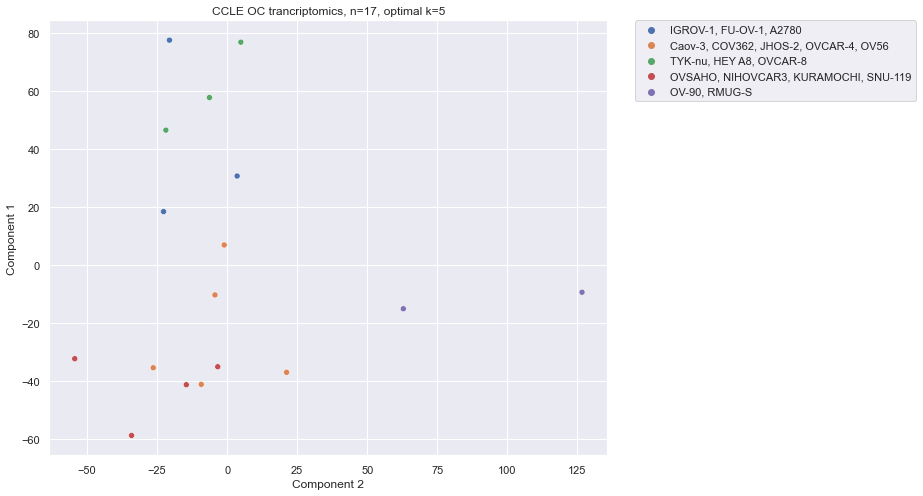

In [158]:
x_axis = df_segm_pca_kmeans['Component 2']
y_axis = df_segm_pca_kmeans['Component 1']
plt.figure(figsize = (10,8))
sns.scatterplot(x_axis, y_axis, hue = df_segm_pca_kmeans['Segment'], palette = palette)
plt.title('CCLE OC trancriptomics, n=17, optimal k=5')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.savefig('CCLE_OC_TOMICS_n=17_k=5', dpi=1200, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches='tight', pad_inches=0.1,
        frameon=None, metadata=None)
plt.show()

In [182]:
array = pca.transform(segmentation_std)
array[16]

array([ 76.84635915,   4.87423282, -16.40714467])

In [160]:
data

,TSPAN6 (ENSG00000000003),TNMD (ENSG00000000005),DPM1 (ENSG00000000419),SCYL3 (ENSG00000000457),C1orf112 (ENSG00000000460),FGR (ENSG00000000938),CFH (ENSG00000000971),FUCA2 (ENSG00000001036),GCLC (ENSG00000001084),NFYA (ENSG00000001167),...,RPS19BP1 (ENSG00000187051),TMPRSS11A (ENSG00000187054),TMEM262 (ENSG00000187066),C3orf70 (ENSG00000187068),TEAD1 (ENSG00000187079),OR2AK2 (ENSG00000187080),PLCD1 (ENSG00000187091),CCK (ENSG00000187094),ENTPD5 (ENSG00000187097),Cluster
OC Broad IDs,,,,,,,,,,,,,,,,,,,,,
A2780,6.524816,1.790772,6.871104,2.803227,4.480265,0.042644,8.082096,4.370862,3.849999,4.496974,...,6.619853,0.000000,0.238787,0.584963,4.801676,0.000000,2.204767,0.084064,2.531069,"IGROV-1, FU-OV-1, A2780"
Caov-3,5.702103,0.000000,7.109778,1.773996,3.505891,0.084064,2.885574,6.671576,6.387673,5.299391,...,6.788816,0.042644,0.807355,0.485427,5.454834,0.042644,1.875780,0.594549,2.189034,"Caov-3, COV362, JHOS-2, OVCAR-4, OV56"
COV362,3.964399,0.042644,6.135248,1.867896,2.678072,0.000000,5.833902,4.969012,4.500165,4.392317,...,5.167920,0.028569,0.910733,0.014355,4.887525,0.000000,2.601697,2.695994,2.724650,"Caov-3, COV362, JHOS-2, OVCAR-4, OV56"
FU-OV-1,5.932864,0.604071,6.687341,1.959770,3.896272,0.028569,0.163499,5.047015,4.301588,4.521051,...,5.919340,0.000000,0.773996,0.042644,5.700162,0.000000,1.014355,0.150560,2.889474,"IGROV-1, FU-OV-1, A2780"
HEY A8,4.410748,0.000000,7.077029,1.937344,3.809414,0.000000,0.505891,6.069960,4.341986,3.363171,...,6.118526,0.000000,0.575312,0.454176,4.207893,0.000000,1.443607,0.000000,2.735522,"TYK-nu, HEY A8, OVCAR-8"
IGROV-1,4.842476,0.000000,6.193969,2.046142,2.885574,0.056584,0.432959,6.395577,4.014355,4.774524,...,6.303050,0.028569,0.641546,0.000000,5.316146,0.000000,1.232661,0.056584,3.382667,"IGROV-1, FU-OV-1, A2780"
JHOS-2,6.512069,0.000000,6.384050,2.636915,4.448240,0.014355,3.392317,5.358256,3.382667,3.941106,...,6.358256,0.028569,0.713696,0.084064,5.194954,0.000000,2.849999,1.416840,2.653060,"Caov-3, COV362, JHOS-2, OVCAR-4, OV56"
KURAMOCHI,4.693208,0.189034,6.848623,2.641546,3.557042,0.111031,2.446256,5.174726,3.289834,4.553361,...,5.647890,0.014355,0.992768,0.014355,5.165510,0.000000,2.531069,0.000000,2.599318,"OVSAHO, NIHOVCAR3, KURAMOCHI, SNU-119"
NIHOVCAR3,5.823495,0.000000,7.369292,2.100978,4.221877,0.042644,0.910733,5.672991,4.676380,4.013462,...,6.117695,0.056584,1.035624,0.070389,5.652773,0.000000,2.286881,2.150560,2.737687,"OVSAHO, NIHOVCAR3, KURAMOCHI, SNU-119"


# ARI between pomics and tomics n=17. 

In [183]:
from sklearn.metrics.cluster import adjusted_rand_score

In [189]:
tomics = n_17_tomics
tomics

,TSPAN6 (ENSG00000000003),TNMD (ENSG00000000005),DPM1 (ENSG00000000419),SCYL3 (ENSG00000000457),C1orf112 (ENSG00000000460),FGR (ENSG00000000938),CFH (ENSG00000000971),FUCA2 (ENSG00000001036),GCLC (ENSG00000001084),NFYA (ENSG00000001167),...,TMEM216 (ENSG00000187049),RPS19BP1 (ENSG00000187051),TMPRSS11A (ENSG00000187054),TMEM262 (ENSG00000187066),C3orf70 (ENSG00000187068),TEAD1 (ENSG00000187079),OR2AK2 (ENSG00000187080),PLCD1 (ENSG00000187091),CCK (ENSG00000187094),ENTPD5 (ENSG00000187097)
OC Broad IDs,,,,,,,,,,,,,,,,,,,,,
A2780,6.524816,1.790772,6.871104,2.803227,4.480265,0.042644,8.082096,4.370862,3.849999,4.496974,...,3.678072,6.619853,0.000000,0.238787,0.584963,4.801676,0.000000,2.204767,0.084064,2.531069
Caov-3,5.702103,0.000000,7.109778,1.773996,3.505891,0.084064,2.885574,6.671576,6.387673,5.299391,...,4.685380,6.788816,0.042644,0.807355,0.485427,5.454834,0.042644,1.875780,0.594549,2.189034
COV362,3.964399,0.042644,6.135248,1.867896,2.678072,0.000000,5.833902,4.969012,4.500165,4.392317,...,4.214125,5.167920,0.028569,0.910733,0.014355,4.887525,0.000000,2.601697,2.695994,2.724650
FU-OV-1,5.932864,0.604071,6.687341,1.959770,3.896272,0.028569,0.163499,5.047015,4.301588,4.521051,...,3.990047,5.919340,0.000000,0.773996,0.042644,5.700162,0.000000,1.014355,0.150560,2.889474
HEY A8,4.410748,0.000000,7.077029,1.937344,3.809414,0.000000,0.505891,6.069960,4.341986,3.363171,...,3.203201,6.118526,0.000000,0.575312,0.454176,4.207893,0.000000,1.443607,0.000000,2.735522
IGROV-1,4.842476,0.000000,6.193969,2.046142,2.885574,0.056584,0.432959,6.395577,4.014355,4.774524,...,4.291309,6.303050,0.028569,0.641546,0.000000,5.316146,0.000000,1.232661,0.056584,3.382667
JHOS-2,6.512069,0.000000,6.384050,2.636915,4.448240,0.014355,3.392317,5.358256,3.382667,3.941106,...,4.507795,6.358256,0.028569,0.713696,0.084064,5.194954,0.000000,2.849999,1.416840,2.653060
KURAMOCHI,4.693208,0.189034,6.848623,2.641546,3.557042,0.111031,2.446256,5.174726,3.289834,4.553361,...,4.251719,5.647890,0.014355,0.992768,0.014355,5.165510,0.000000,2.531069,0.000000,2.599318
NIHOVCAR3,5.823495,0.000000,7.369292,2.100978,4.221877,0.042644,0.910733,5.672991,4.676380,4.013462,...,4.328406,6.117695,0.056584,1.035624,0.070389,5.652773,0.000000,2.286881,2.150560,2.737687


In [190]:
optimal_cluster_number = 5

scaler = StandardScaler()
segmentation_std = scaler.fit_transform(tomics)
pca = PCA(n_components = 3)
pca.fit(segmentation_std)
scores_pca = pca.transform(segmentation_std)
pca.transform(segmentation_std)
kmeans_pca = KMeans(n_clusters = optimal_cluster_number, init = 'k-means++', random_state = 42)
kmeans_pca.fit(scores_pca)
labels = kmeans_pca.predict(scores_pca)

tomics_labels = labels 
tomics_labels

array([4, 0, 0, 4, 1, 4, 0, 2, 2, 0, 3, 0, 1, 2, 3, 2, 1], dtype=int32)

In [191]:
pomics = pd.read_csv(r'/Users/katemeeson/Library/Mobile Documents/com~apple~CloudDocs/MRC-DTP PhD UoM/Datasets/Alternative datasets/CCLE proteomics/Normalised OC cell lines only.csv', index_col = [0])
pomics = pomics.transpose()
N, D = pomics.shape
pomics = pomics.dropna(axis=1, how='any', thresh=None, subset=None, inplace=False)

scaler = StandardScaler()
segmentation_std = scaler.fit_transform(pomics)
pca = PCA(n_components = 3)
pca.fit(segmentation_std)
scores_pca = pca.transform(segmentation_std)
pca.transform(segmentation_std)
kmeans_pca = KMeans(n_clusters = optimal_cluster_number, init = 'k-means++', random_state = 42)
kmeans_pca.fit(scores_pca)
labels = kmeans_pca.predict(scores_pca)
pomics_labels = labels
pomics_labels

array([1, 1, 2, 1, 3, 4, 0, 2, 1, 0, 3, 0, 1, 3, 2, 0, 2], dtype=int32)

In [192]:
print('agreement between pomics/tomics 17 cell lines, k=5', adjusted_rand_score(tomics_labels, pomics_labels))

agreement between pomics/tomics 17 cell lines, k=5 -0.011528449237634809


# Trying to recreate correlation from CCLE paper for a random protein of interest. Each data point should be a separate OC cell line. 
# BAD.
# Just had to find a protein/gene which was in both datasets.

## Check data is normally distributed before using Pearson's correlation coefficient. 
## could do this as a bar chart for each protein I want to correlate. 

In [240]:
bad_pomics = pd.read_csv(r'/Users/katemeeson/Dropbox (The University of Manchester)/My Mac (Kate’s MacBook Pro)/Documents/bad_col_only_3.csv')
bad_pomics = bad_pomics.sort_values('BAD_HUMAN')
bad_pomics

,Uniprot,BAD_HUMAN
14,RMUG-S,-0.680217
2,COV362,-0.570104
10,OV-90,-0.089203
13,OVSAHO,0.030545
6,JHOS-2,0.132331
7,KURAMOCHI,0.135910
4,HEY A8,0.540751
12,OVCAR-8,0.642879
5,IGROV-1,0.700138
0,A2780,0.736780


In [236]:
x_data_bad

0         A2780
1         Caov3
2        COV362
3       FU-OV-1
4        HEY A8
5       IGROV-1
6        JHOS-2
7     KURAMOCHI
8     NIHOVCAR3
9          OV56
10        OV-90
11      OVCAR-4
12      OVCAR-8
13       OVSAHO
14       RMUG-S
15      SNU-119
16       TYK-nu
Name: Uniprot, dtype: object

<ipython-input-241-d4baa8949e13>:5: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('Checking distribution of BAD_HUMAN', dpi=1200, facecolor='w', edgecolor='w',
<ipython-input-241-d4baa8949e13>:5: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "frameon" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('Checking distribution of BAD_HUMAN', dpi=1200, facecolor='w', edgecolor='w',


<AxesSubplot:>

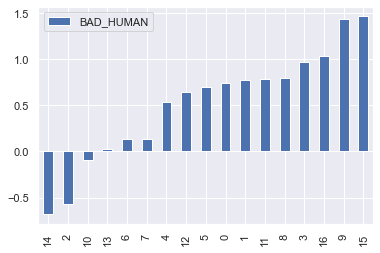

In [241]:
x_data_bad = bad_pomics['Uniprot']
y_data_bad = bad_pomics['BAD_HUMAN']

plot = bad_pomics.plot.bar()
plt.savefig('Checking distribution of BAD_HUMAN', dpi=1200, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches='tight', pad_inches=0.1,
        frameon=None, metadata=None)
plot

In [ ]:
#making categories for range of normalised proteomics values, and using this to do the distribution plotting. 

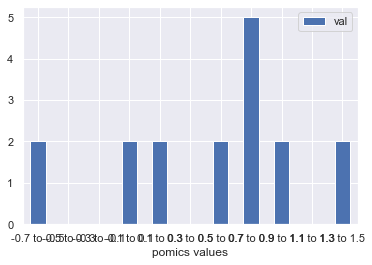

In [243]:
df = pd.DataFrame({'pomics values':['-0.7 to -0.5', '-0.5 to -0.3', '-0.3 to -0.1', '-0.1 to 0.1', '0.1 to 0.3', '0.3 to 0.5', '0.5 to 0.7', '0.7 to 0.9', '0.9 to 1.1', '1.1 to 1.3', '1.3 to 1.5'], 'val':[2, 0, 0, 2, 2, 0, 2, 5, 2, 0, 2]})
ax = df.plot.bar(x='pomics values', y='val', rot=0)

Text(0.5, 1.0, 'Distribution of normalised proteomics expression for BAD_HUMAN; OC cell lines n=17')

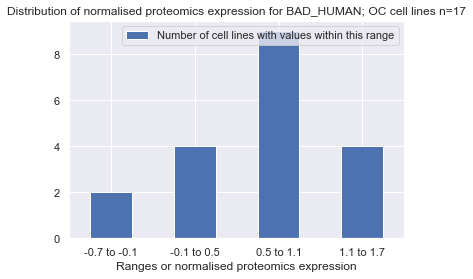

In [246]:
#changing values increments to see if it is more normally distributed this way. 
df = pd.DataFrame({'Ranges or normalised proteomics expression':['-0.7 to -0.1', '-0.1 to 0.5', '0.5 to 1.1', '1.1 to 1.7'], 'Number of cell lines with values within this range':[2, 4, 9, 4]})
ax = df.plot.bar(x='Ranges or normalised proteomics expression', y='Number of cell lines with values within this range', rot=0)
plt.title('Distribution of normalised proteomics expression for BAD_HUMAN; OC cell lines n=17')
plt.savefig('BAD; dist plot', dpi=1200, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches='tight', pad_inches=0.1,
        frameon=None, metadata=None)

In [247]:
#using code recommended for normal distribution plotting. 
import scipy.stats

In [251]:
bad_human_col = bad_pomics['BAD_HUMAN']
print('mean bad_human pomics expression: ', sum(bad_human_col)/len(bad_human_col))

mean bad_human pomics expression:  0.5197719435882353


In [252]:
bad_human_col

14   -0.680217
2    -0.570104
10   -0.089203
13    0.030545
6     0.132331
7     0.135910
4     0.540751
12    0.642879
5     0.700138
0     0.736780
1     0.776692
11    0.780192
8     0.798720
3     0.972836
16    1.029885
9     1.434854
15    1.463133
Name: BAD_HUMAN, dtype: float64

In [253]:
statistics.stdev(bad_human_col)

0.614161208094747

<ipython-input-261-b4e992df947d>:22: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('BAD; dist plot', dpi=1200, facecolor='w', edgecolor='w',
<ipython-input-261-b4e992df947d>:22: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "frameon" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('BAD; dist plot', dpi=1200, facecolor='w', edgecolor='w',


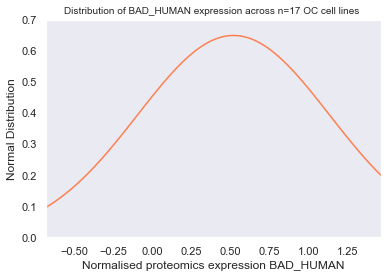

In [261]:
x_min = -0.680217
x_max = 1.463133

mean = 0.5197719435882353 
std = 0.614161208094747

x = np.linspace(x_min, x_max, 100)

y = scipy.stats.norm.pdf(x,mean,std)

plt.plot(x,y, color='coral')

plt.grid()

plt.xlim(x_min,x_max)
plt.ylim(0,0.7)

plt.title('Distribution of BAD_HUMAN expression across n=17 OC cell lines ',fontsize=10)

plt.xlabel('Normalised proteomics expression BAD_HUMAN')
plt.ylabel('Normal Distribution')
plt.savefig('BAD; dist plot', dpi=1200, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches='tight', pad_inches=0.1,
        frameon=None, metadata=None)

In [262]:
#clustering n=44 tomics bad_human to see difference in normal distribution with sample size. 
bad_tomics = pd.read_csv(r'/Users/katemeeson/Dropbox (The University of Manchester)/My Mac (Kate’s MacBook Pro)/Documents/bad_tomics.csv')
bad_tomics

,OC Broad IDs,BAD (ENSG00000002330)
0,ONCO-DG-1,6.239360
1,TOV-112D,4.356144
2,OV56,5.126395
3,Caov-4,5.613237
4,OAW28,6.552592
5,JHOS-2,6.042644
6,JHOM-1,5.881175
7,COV318,5.040016
8,COV362,6.316508
9,OV-90,6.038261


In [281]:
bad_human_col_t = bad_tomics['BAD (ENSG00000002330)']
mean_tomics = sum(bad_human_col_t)/len(bad_human_col_t)
std_tomics = statistics.stdev(bad_human_col_t)
print('mean bad_human tomics expression: ', mean_tomics)
print('std bad_human tomics expression: ', std_tomics)

mean bad_human tomics expression:  5.901545470272726
std bad_human tomics expression:  0.6645650871008484


In [272]:
len(bad_tomics)

44

In [276]:
bad_tomics_sorted = bad_tomics.sort_values('BAD (ENSG00000002330)')
bad_tomics_sorted.iloc[43,1]

7.413120146

<ipython-input-285-c74bdfaa7bb6>:22: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('BAD; dist plot; tomics n=44', dpi=1200, facecolor='w', edgecolor='w',
<ipython-input-285-c74bdfaa7bb6>:22: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "frameon" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('BAD; dist plot; tomics n=44', dpi=1200, facecolor='w', edgecolor='w',


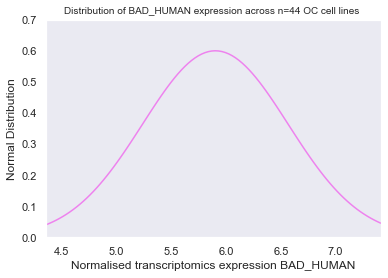

In [285]:
x_min = 4.35614381
x_max = 7.413120146

mean = 5.901545470272726 
std = 0.6645650871008484

x = np.linspace(x_min, x_max, 100)

y = scipy.stats.norm.pdf(x,mean,std)

plt.plot(x,y, color='violet')

plt.grid()

plt.xlim(x_min,x_max)
plt.ylim(0,0.7)

plt.title('Distribution of BAD_HUMAN expression across n=44 OC cell lines ',fontsize=10)

plt.xlabel('Normalised transcriptomics expression BAD_HUMAN')
plt.ylabel('Normal Distribution')
plt.savefig('BAD; dist plot; tomics n=44', dpi=1200, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches='tight', pad_inches=0.1,
        frameon=None, metadata=None)

In [286]:
bad_t_17 = pd.read_csv(r'/Users/katemeeson/Dropbox (The University of Manchester)/My Mac (Kate’s MacBook Pro)/Documents/bad_t_17.csv')
bad_t_17

,OC Broad IDs,BAD (ENSG00000002330)
0,A2780,5.341986
1,Caov-3,6.510487
2,COV362,6.316508
3,FU-OV-1,6.067165
4,HEY A8,5.080231
5,IGROV-1,5.135863
6,JHOS-2,6.042644
7,KURAMOCHI,6.057667
8,NIHOVCAR3,6.091277
9,OV56,5.126395


In [287]:
bad_col_t_17 = bad_t_17['BAD (ENSG00000002330)']
mean_tomics = sum(bad_col_t_17)/len(bad_col_t_17)
std_tomics = statistics.stdev(bad_col_t_17)
print('mean bad_human tomics expression: ', mean_tomics)
print('std bad_human tomics expression: ', std_tomics)

mean bad_human tomics expression:  5.978233917705883
std bad_human tomics expression:  0.5910109951882562


In [289]:
bad_t_17_sorted = bad_t_17.sort_values('BAD (ENSG00000002330)')
bad_t_17_sorted.iloc[16,1]

7.075639589

<ipython-input-293-bc4bcac820bd>:19: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('BAD; dist plot; tomics n=17', dpi=1200, facecolor='w', edgecolor='w',
<ipython-input-293-bc4bcac820bd>:19: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "frameon" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('BAD; dist plot; tomics n=17', dpi=1200, facecolor='w', edgecolor='w',


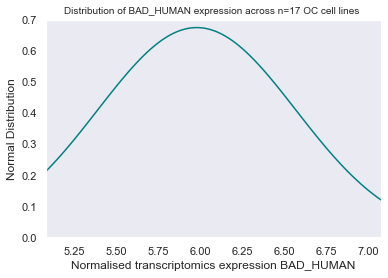

In [293]:
x_min = bad_t_17_sorted.iloc[0,1]
x_max = bad_t_17_sorted.iloc[16,1]

x = np.linspace(x_min, x_max, 100)

y = scipy.stats.norm.pdf(x,mean_tomics,std_tomics)

plt.plot(x,y, color='teal')

plt.grid()

plt.xlim(x_min,x_max)
plt.ylim(0,0.7)

plt.title('Distribution of BAD_HUMAN expression across n=17 OC cell lines ',fontsize=10)

plt.xlabel('Normalised transcriptomics expression BAD_HUMAN')
plt.ylabel('Normal Distribution')
plt.savefig('BAD; dist plot; tomics n=17', dpi=1200, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches='tight', pad_inches=0.1,
        frameon=None, metadata=None)

## clustering for random protein as a starting point... 

In [296]:
BAD_data = pd.read_csv(r'/Users/katemeeson/Library/Mobile Documents/com~apple~CloudDocs/MRC-DTP PhD UoM/correlating_bad_2.csv', index_col = [0])
BAD_data = BAD_data.sort_values('BAD transcriptomics')
BAD_data

,BAD proteomics,BAD transcriptomics
OC cell line,,
HEY A8,0.540751,5.080231
OV56,1.434854,5.126395
IGROV-1,0.700138,5.135863
TYK-nu,1.029885,5.335926
A2780,0.736780,5.341986
OV-90,-0.089203,6.038261
JHOS-2,0.132331,6.042644
KURAMOCHI,0.135910,6.057667
FU-OV-1,0.972836,6.067165


/opt/anaconda3/envs/sklearn-env/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
<ipython-input-203-1bfa86940aa3>:5: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('BAD; OC only', dpi=1200, facecolor='w', edgecolor='w',
<ipython-input-203-1bfa86940aa3>:5: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "frameon" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('BAD; OC only', dpi=1200, facecolor='w', edgecolor='w',


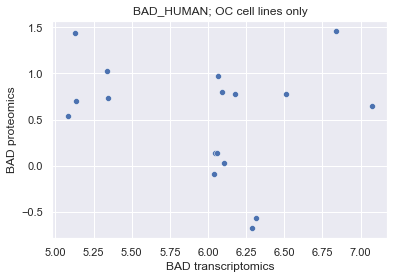

In [203]:
x_data = BAD_data['BAD transcriptomics']
y_data = BAD_data['BAD proteomics']

sns.scatterplot(x_data, y_data).set(title='BAD_HUMAN; OC cell lines only')
plt.savefig('BAD; OC only', dpi=1200, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches='tight', pad_inches=0.1,
        frameon=None, metadata=None)

# correlating all of the cell lines for BAD. See if it's OC which skews. Could this mean OC has a more variable proteome than other cell lines; try and add other cell lines. Maybe OC sits within that wide cluster. Or is it just the protein I chose, choose EGFR instead. Is it my scatterplot method; try pearsons correlation. Test these options. Put workflow in presentation. 

## is it the scatterplot method? Plot to find pearsons coefficient. 

In [200]:
import scipy as sp

sp.stats.pearsonr(x_data, y_data)

(-0.19032711929808108, 0.46435478154687293)

# Is it just because BAD doesn't correlate? Try with EGFR instead and see where it fits on the original correlation graph. 

In [324]:
EGFR_data = pd.read_csv(r'/Users/katemeeson/Dropbox (The University of Manchester)/My Mac (Kate’s MacBook Pro)/Documents/correlating_egfr_2.csv')
EGFR_data

,OC cell line,EGFR proteomics,EGFR transcriptomics
0,A2780,0.428572,1.454176
1,Caov3,1.165548,5.416164
2,COV362,-0.460802,5.921484
3,FU-OV-1,0.725035,4.334139
4,HEY A8,-1.023845,6.019480
5,IGROV-1,-1.092403,4.505256
6,JHOS-2,0.313746,4.035624
7,KURAMOCHI,2.914679,2.090853
8,NIHOVCAR3,1.208459,4.322649
9,OV56,1.565503,5.242221


In [325]:
EGFR_data_sorted = EGFR_data.sort_values('EGFR transcriptomics')
EGFR_data_sorted

,OC cell line,EGFR proteomics,EGFR transcriptomics
10,OV-90,2.372939,1.378512
0,A2780,0.428572,1.454176
13,OVSAHO,-0.803205,1.794936
7,KURAMOCHI,2.914679,2.090853
16,TYK-nu,0.653639,3.472488
15,SNU-119,-1.738698,3.782409
6,JHOS-2,0.313746,4.035624
11,OVCAR-4,-1.280579,4.184280
8,NIHOVCAR3,1.208459,4.322649
3,FU-OV-1,0.725035,4.334139


/opt/anaconda3/envs/sklearn-env/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
<ipython-input-326-015caa18b03d>:5: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('EGFR; OC only', dpi=1200, facecolor='w', edgecolor='w',
<ipython-input-326-015caa18b03d>:5: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "frameon" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('EGFR; OC only', dpi=1200, facecolor='w', edgecolor='w',


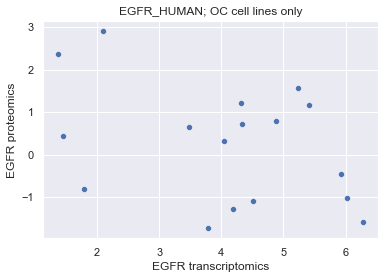

In [326]:
x_data = EGFR_data['EGFR transcriptomics']
y_data = EGFR_data['EGFR proteomics']

sns.scatterplot(x_data, y_data).set(title='EGFR_HUMAN; OC cell lines only')
plt.savefig('EGFR; OC only', dpi=1200, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches='tight', pad_inches=0.1,
        frameon=None, metadata=None)

In [327]:
sp.stats.pearsonr(x_data, y_data)

(-0.3941063715753252, 0.11751029190491252)

# Choosing the most highly abundant proteins, as these probably correlate well. Can correlate with cell lines as data points, then proteins as data points and do top 20 mRNA-protein pairs, for example. 

In [328]:
A2780_pomics = pd.read_csv(r'/Users/katemeeson/Library/Mobile Documents/com~apple~CloudDocs/MRC-DTP PhD UoM/Datasets/Alternative datasets/PARE datasets/PARE_pomics_2columns.csv')
A2780_pomics

,gene id,abund
0,2,-1.890738
1,9,1.169122
2,12,-1.843978
3,14,-1.169066
4,16,0.313417
...,...,...
8256,100131755,-0.305946
8257,100272147,0.277199
8258,100529261,-0.467713
8259,100885850,-1.456273


In [329]:
A2780_tomics = pd.read_csv(r'/Users/katemeeson/Library/Mobile Documents/com~apple~CloudDocs/MRC-DTP PhD UoM/Datasets/Alternative datasets/PARE datasets/PARE_tomics_2columns_2.csv')
A2780_tomics

,gene id,abund
0,2,0.014355
1,9,1.475085
2,12,3.986411
3,14,6.650190
4,16,7.704388
...,...,...
8256,100131755,2.307429
8257,100272147,2.887525
8258,100529261,1.974529
8259,100885850,1.454176


In [330]:
A2780_p_sorted = A2780_pomics.sort_values('abund', ascending = False)
A2780_p_sorted

,gene id,abund
2253,6490,7.215532
7494,115106,5.417574
3931,10815,5.287789
7074,84219,5.038629
1738,5286,4.969600
...,...,...
3989,10959,-8.783338
5297,51522,-9.074688
876,2584,-11.837871
4135,11285,-12.475099


In [331]:
top_83_A2780 = A2780_p_sorted.iloc[0:83,:]
top_83_A2780.to_csv('top_83_A2780.csv')
top_83_A2780_p = top_83_A2780
top_83_A2780_p = top_83_A2780.sort_values('gene id')
top_83_A2780_p

,gene id,abund
89,249,3.133304
101,292,4.541924
162,421,3.347138
284,788,3.825635
361,972,4.378500
...,...,...
7584,124454,4.674498
7981,222229,3.525649
8067,283871,3.752648
8159,374654,2.894268


In [332]:
top_83_A2780_t = pd.read_csv(r'/Users/katemeeson/Dropbox (The University of Manchester)/UNIMAN Ovarian Cancer Project/July August modelling/top_83_A2780_t.csv')
top_83_A2780_t

,gene ids,tomics
0,249,0.097611
1,292,8.266693
2,421,2.280956
3,788,3.714795
4,972,3.372952
...,...,...
78,124454,4.436961
79,222229,3.051372
80,283871,3.779260
81,374654,1.531069


In [334]:
print(sp.stats.pearsonr(x_list, y_list))

(-0.05759940235016172, 0.6049977027410444)


In [333]:
x_list = []
for x in top_83_A2780_t['tomics']:
    x_list.append(x)
    
y_list = []
for y in top_83_A2780_p['abund']:
    y_list.append(y)
    
print(x_list, '\n', y_list)

[0.097610797, 8.266692856, 2.280956314, 3.714795011, 3.372952098, 4.731726323, 3.3305584, 0.056583528, 5.880195729, 5.948133578, 5.144454314, 6.147713722, 5.275752049, 2.263034406, 5.60940039, 7.7106687, 9.414642958, 6.655208697, 1.275007047, 0.432959407, 4.412104045, 3.937344392, 4.432959407, 6.832257114, 7.309339922, 3.94016675, 3.523561956, 3.991861931, 5.055282436, 5.048759312, 1.422233001, 5.605257263, 6.198101209, 1.232660757, 6.59812696, 1.992768431, 10.03562391, 6.898571158, 4.811984719, 4.852498299, 4.061776198, 0.0, 0.333423734, 6.17292749, 3.237257771, 5.337354298, 2.087462841, 4.631104282, 2.510961919, 1.411426246, 5.237640195, 5.831623937, 5.183883459, 0.443606651, 1.709290636, 4.612352499, 3.150559677, 4.855491443, 4.287620044, 7.50247382, 5.936166778, 3.390942773, 4.012568674, 5.764473551, 3.655351829, 3.337711092, 3.697106574, 5.824513297, 4.654779217, 2.464668267, 5.358607249, 1.257010618, 3.866907978, 3.906890596, 3.851998837, 4.040015679, 3.735522177, 1.250961574, 4.

/opt/anaconda3/envs/sklearn-env/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
<ipython-input-336-5c40a5aaf84a>:4: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('top 10% A2780 proteomics', dpi=1200, facecolor='w', edgecolor='w',
<ipython-input-336-5c40a5aaf84a>:4: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "frameon" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('top 10% A2780 proteomics', dpi=1200, facecolor='w', edgecolor='w',


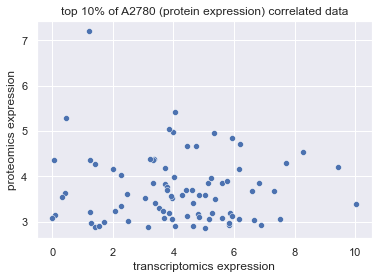

In [336]:
sns.scatterplot(x_list, y_list).set(title='top 10% of A2780 (protein expression) correlated data')
plt.xlabel('transcriptomics expression')
plt.ylabel('proteomics expression')
plt.savefig('top 10% A2780 proteomics', dpi=1200, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches='tight', pad_inches=0.1,
        frameon=None, metadata=None)

# Picking the most highly expressed protein from one cell line, which I predict to have strong positive correlation, and seeing if I can visualise this. 

In [339]:
#Chosen MUC1, from A2780 proteomics. 
muc1 = pd.read_csv(r'/Users/katemeeson/Library/Mobile Documents/com~apple~CloudDocs/MRC-DTP PhD UoM/Datasets/Data subsets/Correlation work/MUC1.csv', index_col = [0])
muc1 = muc1.transpose()
muc1

Uniprot,MUC1,MUC1
A2780,3.778209,4.790373
Caov3,9.498769,1.956905
COV362,7.001915,-0.647451
FU-OV-1,1.356144,2.042720
HEY A8,0.748461,-0.404045
IGROV-1,1.863938,-2.767256
JHOS-2,3.794936,-0.245595
KURAMOCHI,7.862141,-1.629140
NIHOVCAR3,4.938756,1.754172
OV56,3.323370,3.656401


In [343]:
muc1_x = muc1.iloc[:,0]
muc1_y = muc1.iloc[:,1]

(0.08493979647494203, 0.7458424893416158)


/opt/anaconda3/envs/sklearn-env/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
<ipython-input-346-01e346627608>:5: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('MUC1 correlation', dpi=1200, facecolor='w', edgecolor='w',
<ipython-input-346-01e346627608>:5: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "frameon" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('MUC1 correlation', dpi=1200, facecolor='w', edgecolor='w',


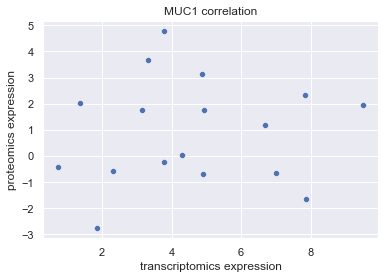

In [346]:
print(sp.stats.pearsonr(muc1_x, muc1_y))
sns.scatterplot(muc1_x, muc1_y).set(title='MUC1 correlation')
plt.xlabel('transcriptomics expression')
plt.ylabel('proteomics expression')
plt.savefig('MUC1 correlation', dpi=1200, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches='tight', pad_inches=0.1,
        frameon=None, metadata=None)

In [347]:
#correlating the top five proteins. Making a dataset with A2780.1 etc...
top_5_a2780 = pd.read_csv(r'/Users/katemeeson/Library/Mobile Documents/com~apple~CloudDocs/MRC-DTP PhD UoM/Datasets/Data subsets/Correlation work/top five A2780.csv', index_col = [0])
top_5_a2780 = top_5_a2780.transpose()
top_5_a2780

Uniprot,tomics,pomics
A2780,3.778209,4.790373
Caov3,9.498769,1.956905
COV362,7.001915,-0.647451
FU-OV-1,1.356144,2.042720
HEY A8,0.748461,-0.404045
...,...,...
OVCAR-8.5,3.221647,1.669027
OVSAHO.5,1.104101,0.687061
RMUG-S.5,-1.304383,6.407353
SNU-119.5,-1.110007,0.659925


In [349]:
top5a2780_x = top_5_a2780.iloc[:,0]
top5a2780_y = top_5_a2780.iloc[:,1]

(-0.31842216953196156, 0.0011078326886522379)


/opt/anaconda3/envs/sklearn-env/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
<ipython-input-351-b7d8b43f3892>:5: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('top 5 a2780 correlation', dpi=1200, facecolor='w', edgecolor='w',
<ipython-input-351-b7d8b43f3892>:5: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "frameon" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('top 5 a2780 correlation', dpi=1200, facecolor='w', edgecolor='w',


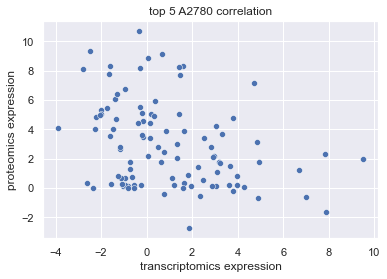

In [351]:
print(sp.stats.pearsonr(top5a2780_x, top5a2780_y))
sns.scatterplot(top5a2780_x, top5a2780_y).set(title='top 5 A2780 correlation')
plt.xlabel('transcriptomics expression')
plt.ylabel('proteomics expression')
plt.savefig('top 5 a2780 correlation', dpi=1200, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches='tight', pad_inches=0.1,
        frameon=None, metadata=None)

# plotting non-normalised proteomics versus normalised transcriptomics. 

In [358]:
non_norm_p_and_tomics = pd.read_csv(r'/Users/katemeeson/Library/Mobile Documents/com~apple~CloudDocs/MRC-DTP PhD UoM/Datasets/Data subsets/Correlation work/EGFR OC only 2.csv', index_col = [0])
non_norm_p_and_tomics = non_norm_p_and_tomics.transpose()
non_norm_p_and_tomics

Gene.Symbol,EGFR pomics,EGFR (ENSG00000146648)
A2780,768.508,1.454176
Caov-3,5800.930,5.416164
COV362,6650.720,5.921484
FU-OV-1,1634.820,4.334139
HEY A8,9549.030,6.019480
IGROV-1,5566.450,4.505256
JHOS-2,4531.460,4.035624
KURAMOCHI,521.351,2.090853
NIHOVCAR3,6042.400,4.322649
OV56,4837.070,5.242221


In [359]:
non_norm_p_and_tomics_x = non_norm_p_and_tomics.iloc[:,1]
non_norm_p_and_tomics_y = non_norm_p_and_tomics.iloc[:,0]

In [367]:
non_norm_p_and_tomics_x

A2780        1.454176
Caov-3       5.416164
COV362       5.921484
FU-OV-1      4.334139
HEY A8       6.019480
IGROV-1      4.505256
JHOS-2       4.035624
KURAMOCHI    2.090853
NIHOVCAR3    4.322649
OV56         5.242221
OV-90        1.378512
OVCAR-4      4.184280
OVCAR-8      4.879706
OVSAHO       1.794936
RMUG-S       6.278728
SNU-119      3.782409
TYK-nu       3.472488
Name: EGFR (ENSG00000146648), dtype: float64

(0.8600423650247757, 9.548236309209548e-06)


/opt/anaconda3/envs/sklearn-env/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
<ipython-input-361-50e7e452dcfc>:5: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('non_norm_pomics_EGFR_OC_only', dpi=1200, facecolor='w', edgecolor='w',
<ipython-input-361-50e7e452dcfc>:5: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "frameon" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('non_norm_pomics_EGFR_OC_only', dpi=1200, facecolor='w', edgecolor='w',


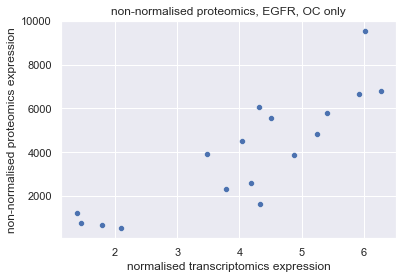

In [361]:
print(sp.stats.pearsonr(non_norm_p_and_tomics_x, non_norm_p_and_tomics_y))
sns.scatterplot(non_norm_p_and_tomics_x, non_norm_p_and_tomics_y).set(title='non-normalised proteomics, EGFR, OC only')
plt.xlabel('normalised transcriptomics expression')
plt.ylabel('non-normalised proteomics expression')
plt.savefig('non_norm_pomics_EGFR_OC_only', dpi=1200, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches='tight', pad_inches=0.1,
        frameon=None, metadata=None)

# re-plotting normalised proteomics and normalised transcriptomics

In [362]:
norm_p_egfr_oc = pd.read_csv(r'/Users/katemeeson/Library/Mobile Documents/com~apple~CloudDocs/MRC-DTP PhD UoM/Datasets/Data subsets/Correlation work/EGFR OC only normalised pomics.csv', index_col = [0])
norm_p_egfr_oc = norm_p_egfr_oc.transpose()
norm_p_egfr_oc

Gene.Symbol,EGFR_HUMAN,EGFR (ENSG00000146648)
A2780,0.428572,1.454176
Caov-3,1.165548,5.416164
COV362,-0.460802,5.921484
FU-OV-1,0.725035,4.334139
HEY A8,-1.023845,6.019480
IGROV-1,-1.092403,4.505256
JHOS-2,0.313746,4.035624
KURAMOCHI,2.914679,2.090853
NIHOVCAR3,1.208459,4.322649
OV56,1.565503,5.242221


In [363]:
norm_p_and_tomics_x = norm_p_egfr_oc.iloc[:,1]
norm_p_and_tomics_y = norm_p_egfr_oc.iloc[:,0]

(-0.3941063715753252, 0.11751029190491252)


/opt/anaconda3/envs/sklearn-env/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'normalised proteomics expression')

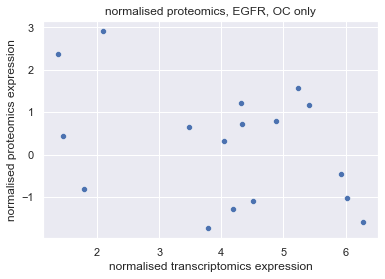

In [364]:
print(sp.stats.pearsonr(norm_p_and_tomics_x, norm_p_and_tomics_y))
sns.scatterplot(norm_p_and_tomics_x, norm_p_and_tomics_y).set(title='normalised proteomics, EGFR, OC only')
plt.xlabel('normalised transcriptomics expression')
plt.ylabel('normalised proteomics expression')

# non-normalised all cell lines versus normalised transcriptomics